# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 11 </span>
## <span style="color:orange"> Keras - Neural Network regression </span>

In questa esercitazione andremo a fare delle regressioni lineari su dati rumorosi con una rete neurale.

### Introduzione

Le reti neurali sono strutture complesse che dipendono da un gran numero di parametri. La loro funzione può essere rappresentata come una combinazione di diverse funzioni più semplici, note come neuroni.
Una rete neurale è composta da una serie di strati di neuroni, dove l'output di ciascun strato serve come input per lo strato successivo.
In una rete densa, ogni neurone di un dato strato è collegato a tutti i neuroni degli strati adiacenti. L'input per ciascun neurone è una somma pesata degli output dei neuroni degli strati precedenti, a cui viene aggiunto un termine noto come bias. Questo input modificato viene poi passato attraverso una funzione particolare, chiamata funzione di attivazione.
Queste funzioni introducono non linearità nel modello, permettendo alla rete di apprendere e rappresentare relazioni complesse nei dati, alcuni esempi sono: Sigmoid (che trasforma l'input in un valore tra $[0,1]$), Tanh (che trasforma l'input in un valore tra $[-1,1]$), ReLU (che trasforma l'input nel massimo tra $0$ e l'input stesso).

### Il problema di predizione

Consideriamo un processo probabilistico che ci dà dei dati con dei label $(x,y)$, dove $y$ è il label. I dati vengono generati nel seguente modo: $$y_i=f(x_i)+\eta_i$$
dove $f(x_i)$ è una funzione fissata, che però può essere ignota, mentre $\eta_i$ è una gaussiana, e il rumore è $\langle\eta_i\rangle=\delta_{ij}\sqrt{\sigma}$. Considereremo $f(x_i)$ i "valori veri" per generare i dati.

Per fare previsioni, considereremo una rete neurale che dipende dai suoi parametri, pesi e bias. Le funzioni che la rete neurale può modellare rappresentano la classe di modelli che stiamo utilizzando per cercare di modellare i dati e fare previsioni.

Per apprendere i parametri della rete neurale, addestreremo i nostri modelli su un set di dati di addestramento e poi testeremo l'efficacia della rete neurale su un set di dati differente, il set di dati di validazione. La ragione per cui dobbiamo dividere i nostri dati in un set di dati di addestramento e uno di test è che l'obiettivo del machine learning è fare previsioni accurate su nuovi dati mai visti.

Per misurare la nostra capacità di previsione, apprenderemo i nostri parametri adattando il nostro set di dati di addestramento e poi faremo previsioni sul nostro set di dati di test. Una misura comune della performance predittiva del nostro algoritmo è confrontare le previsioni, $\{y_j^\mathrm{pred}\}$, con i valori reali $\{y_j\}$. Una misura comunemente utilizzata per questo è la somma degli errori quadrati medi (MSE) sul set di test:
$$
\text{MSE}= \frac{1}{N_\mathrm{test}}\sum_{j=1}^{N_\mathrm{test}} (y_j^\mathrm{pred}-y_j)^2
$$

Cercheremo di ottenere un quadro qualitativo esaminando i grafici sui dati di validazione e di addestramento.

### Fit lineare

In questo esercizio considereremo la seguente funzione:
$$
f(x)=2x+1
$$

Partiamo definendo i parametri di una funzione lineare ideale, che andremo a predirre con la rete neurale

In [1]:
# target parameters of f(x) = m*x + b
m = 2 # slope
b = 1 # intersect

Nella cella successiva generiamo un set di dati di input che verranno sporcati usando del rumore casuale

In [2]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
y_target = m * x_valid + b # ideal (target) linear function

sigma = 0.5 
y_train = np.random.normal(m * x_train + b, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(m * x_valid + b, sigma)

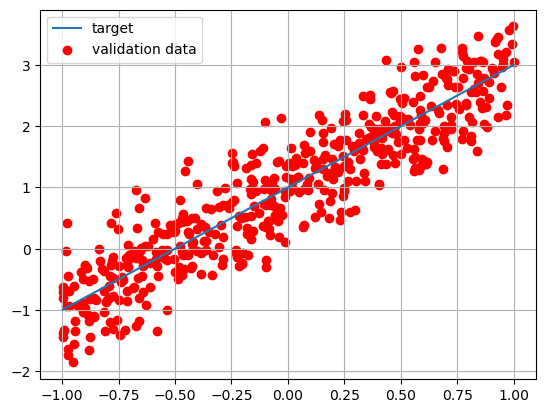

In [3]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

Usiamo ora un solo layer e un solo neurone

In [6]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
#from tensorflow.keras import backend as K
#from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,))) #un solo neurone con unput shape 1, ho solo la x

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse']) #mse è mean square error

In [7]:
# get a summary of our composed model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Ora addestreremo il nostro modello, cioè forniremo al neurone il set di coppie di addestramento $x, y_{\text{train}}$ dal quale l'ottimizzatore troverà i migliori pesi per minimizzare la funzione di perdita dell'errore quadratico medio (la nostra funzione di regressione lineare).

In [8]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/50
157/157 [==============================] - 1s 2ms/step - loss: 1.2726 - mse: 1.2726 - val_loss: 0.4748 - val_mse: 0.4748
Epoch 2/50
157/157 [==============================] - 0s 936us/step - loss: 0.3541 - mse: 0.3541 - val_loss: 0.2640 - val_mse: 0.2640
Epoch 3/50
157/157 [==============================] - 0s 905us/step - loss: 0.2585 - mse: 0.2585 - val_loss: 0.2404 - val_mse: 0.2404
Epoch 4/50
157/157 [==============================] - 0s 900us/step - loss: 0.2470 - mse: 0.2470 - val_loss: 0.2380 - val_mse: 0.2380
Epoch 5/50
157/157 [==============================] - 0s 938us/step - loss: 0.2455 - mse: 0.2455 - val_loss: 0.2380 - val_mse: 0.2380
Epoch 6/50
157/157 [==============================] - 0s 905us/step - loss: 0.2453 - mse: 0.2453 - val_loss: 0.2381 - val_mse: 0.2381
Epoch 7/50
157/157 [==============================] - 0s 898us/step - loss: 0.2454 - mse: 0.2454 - val_loss: 0.2381 - val_mse: 0.2381
Epoch 8/50
157/157 [==============================] - 0s 864us/s

By looking at weights and biases we can see if the linear fit was successfull: $w_1$ represents the angular coefficient, $b$ the intercept.

In [9]:
# return weights and biases
model.get_weights()

[array([[1.9881195]], dtype=float32), array([1.0043379], dtype=float32)]

In [10]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 975us/step - loss: 0.2382 - mse: 0.2382

Test loss: 0.23816514015197754
Test accuracy: 0.23816514015197754


In [11]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

16/16 [==============================] - 0s 848us/step - loss: 6.6041e-05 - mse: 6.6041e-05

Test loss: 6.604060035897419e-05
Test accuracy: 6.604060035897419e-05


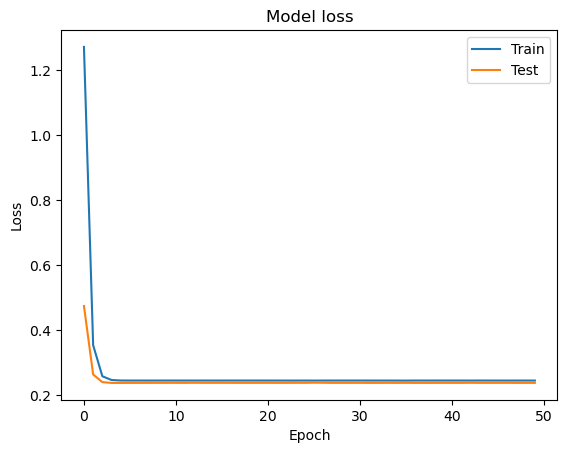

In [12]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

4/4 [==============================] - 0s 1ms/step


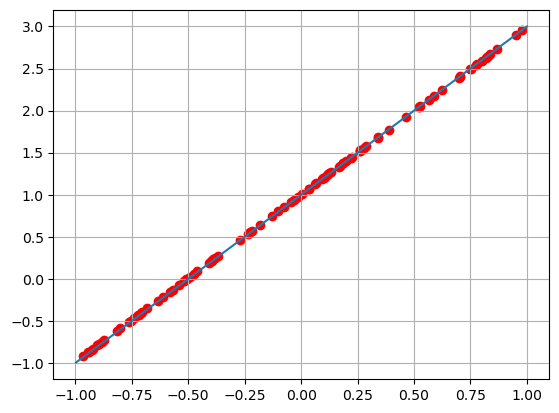

In [13]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()

### Exercise 11.2

In questo esercizio cercheremo di approssimare questo polinomio:

$$
f(x)=4-3x-2x^2+3x^3
$$
con $x \in [-1,1]$.

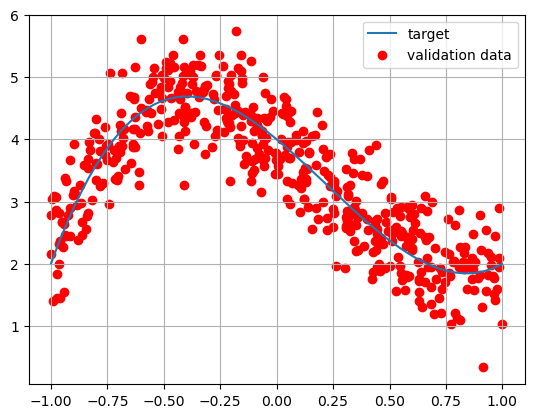

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_107 (Dense)           (None, 4)                 8         
                                                                 
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
157/157 [==============================] - 2s 10ms/step - loss: 7.8449 - mse: 7.8449 - val_loss: 4.2155 - val_mse: 4.2155
Epoch 2/50
157/157 [==============================] - 2s 13ms/step - loss: 2.6742 - mse: 2.6742 - val_loss: 1.6833 - val_mse: 1.6833
Epoch 3/50
157/157 [==============================] - 2s 10ms/step - loss: 1.3640 - mse: 1.3640 - val_loss: 1.0747 - val_mse: 1.0747
Epoch 4/50
157/157 [==============================] - 2s 10ms/step - loss: 1.0346 - mse: 1.0346 - val_loss: 0.9039 - val_mse: 0.9039
Epoch 5/50
157/157 [==============================] - 1

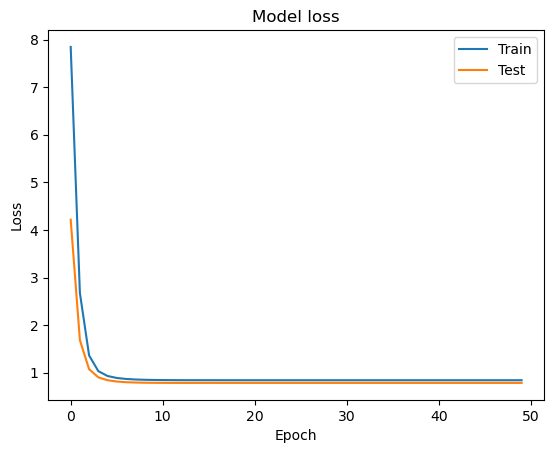

In [23]:
x_train = np.random.uniform(-1, 1, 5000)
x_valid = np.random.uniform(-1, 1, 500)
x_valid.sort()
def polynomial_function(x, a=3, b=-2, c=-3, d=4):
    return d + c * x + b * x * x + a * x * x * x
y_target = polynomial_function(x_valid) # ideal (target) linear function

sigma = 0.5 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(polynomial_function(x_train), sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(polynomial_function(x_valid), sigma)

plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

model = tf.keras.Sequential()
model.add(Dense(4, input_shape=(1,), activation='relu'))

# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse']) #mse è mean square error
# get a summary of our composed model
model.summary()

# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=50,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

# return weights and biases
model.get_weights()

# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()



Epoch 1/50
157/157 [==============================] - 2s 8ms/step - loss: 1.4834 - val_loss: 0.6664
Epoch 2/50
157/157 [==============================] - 1s 9ms/step - loss: 0.6860 - val_loss: 0.5959
Epoch 3/50
157/157 [==============================] - 1s 9ms/step - loss: 0.6103 - val_loss: 0.5195
Epoch 4/50
157/157 [==============================] - 1s 7ms/step - loss: 0.5295 - val_loss: 0.4451
Epoch 5/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4585 - val_loss: 0.3875
Epoch 6/50
157/157 [==============================] - 1s 5ms/step - loss: 0.4057 - val_loss: 0.3480
Epoch 7/50
157/157 [==============================] - 1s 5ms/step - loss: 0.3684 - val_loss: 0.3174
Epoch 8/50
157/157 [==============================] - 1s 5ms/step - loss: 0.3414 - val_loss: 0.2991
Epoch 9/50
157/157 [==============================] - 1s 4ms/step - loss: 0.3204 - val_loss: 0.2856
Epoch 10/50
157/157 [==============================] - 1s 5ms/step - loss: 0.3050 - val_loss: 0.2679

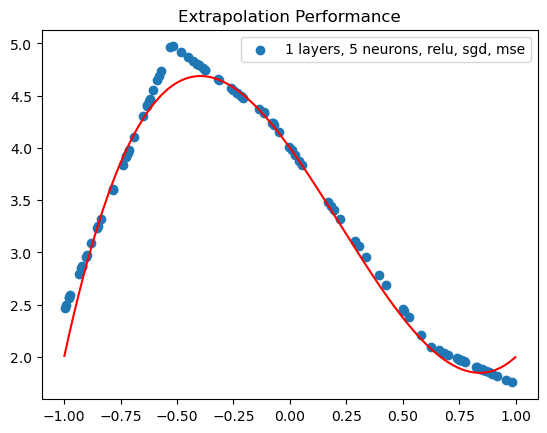

Epoch 1/50
157/157 [==============================] - 2s 9ms/step - loss: 1.8471 - val_loss: 0.7934
Epoch 2/50
157/157 [==============================] - 1s 10ms/step - loss: 0.7041 - val_loss: 0.6242
Epoch 3/50
157/157 [==============================] - 1s 6ms/step - loss: 0.6370 - val_loss: 0.6043
Epoch 4/50
157/157 [==============================] - 1s 7ms/step - loss: 0.6204 - val_loss: 0.5881
Epoch 5/50
157/157 [==============================] - 2s 12ms/step - loss: 0.6039 - val_loss: 0.5721
Epoch 6/50
157/157 [==============================] - 1s 8ms/step - loss: 0.5873 - val_loss: 0.5570
Epoch 7/50
157/157 [==============================] - 1s 9ms/step - loss: 0.5711 - val_loss: 0.5387
Epoch 8/50
157/157 [==============================] - 1s 8ms/step - loss: 0.5551 - val_loss: 0.5254
Epoch 9/50
157/157 [==============================] - 1s 9ms/step - loss: 0.5407 - val_loss: 0.5098
Epoch 10/50
157/157 [==============================] - 2s 10ms/step - loss: 0.5262 - val_loss: 0.5

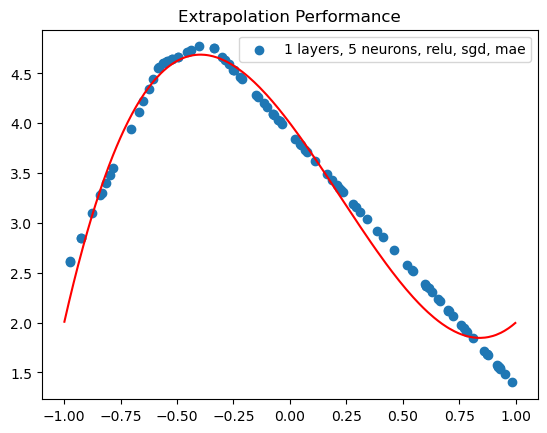

Epoch 1/50
157/157 [==============================] - 3s 12ms/step - loss: 10.9140 - val_loss: 9.7570
Epoch 2/50
157/157 [==============================] - 1s 5ms/step - loss: 8.3241 - val_loss: 7.0618
Epoch 3/50
157/157 [==============================] - 1s 9ms/step - loss: 5.6150 - val_loss: 4.2879
Epoch 4/50
157/157 [==============================] - 1s 7ms/step - loss: 3.1031 - val_loss: 2.1796
Epoch 5/50
157/157 [==============================] - 1s 9ms/step - loss: 1.6267 - val_loss: 1.2217
Epoch 6/50
157/157 [==============================] - 2s 11ms/step - loss: 1.0648 - val_loss: 0.9171
Epoch 7/50
157/157 [==============================] - 2s 10ms/step - loss: 0.9120 - val_loss: 0.8319
Epoch 8/50
157/157 [==============================] - 1s 6ms/step - loss: 0.8647 - val_loss: 0.7955
Epoch 9/50
157/157 [==============================] - 1s 9ms/step - loss: 0.8337 - val_loss: 0.7655
Epoch 10/50
157/157 [==============================] - 2s 10ms/step - loss: 0.8027 - val_loss: 0

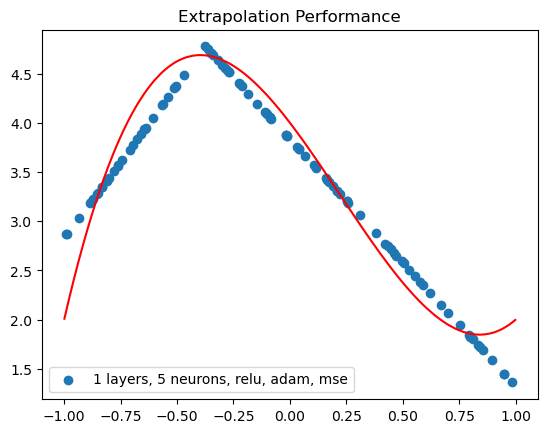

Epoch 1/50
157/157 [==============================] - 2s 9ms/step - loss: 2.8844 - val_loss: 2.6417
Epoch 2/50
157/157 [==============================] - 2s 11ms/step - loss: 2.3754 - val_loss: 2.1876
Epoch 3/50
157/157 [==============================] - 1s 9ms/step - loss: 1.9547 - val_loss: 1.7109
Epoch 4/50
157/157 [==============================] - 1s 6ms/step - loss: 1.4278 - val_loss: 1.0906
Epoch 5/50
157/157 [==============================] - 1s 7ms/step - loss: 0.8548 - val_loss: 0.6551
Epoch 6/50
157/157 [==============================] - 1s 7ms/step - loss: 0.6300 - val_loss: 0.5832
Epoch 7/50
157/157 [==============================] - 1s 7ms/step - loss: 0.5956 - val_loss: 0.5703
Epoch 8/50
157/157 [==============================] - 1s 9ms/step - loss: 0.5823 - val_loss: 0.5583
Epoch 9/50
157/157 [==============================] - 1s 7ms/step - loss: 0.5708 - val_loss: 0.5466
Epoch 10/50
157/157 [==============================] - 1s 8ms/step - loss: 0.5598 - val_loss: 0.536

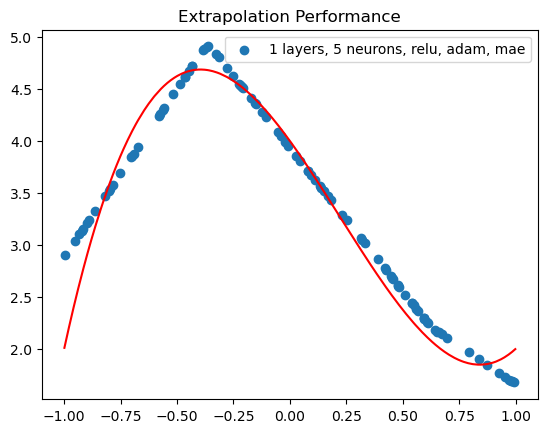

Epoch 1/50
157/157 [==============================] - 2s 10ms/step - loss: 1.8777 - val_loss: 0.9930
Epoch 2/50
157/157 [==============================] - 1s 8ms/step - loss: 0.9783 - val_loss: 0.8208
Epoch 3/50
157/157 [==============================] - 1s 8ms/step - loss: 0.8375 - val_loss: 0.7312
Epoch 4/50
157/157 [==============================] - 2s 11ms/step - loss: 0.7654 - val_loss: 0.6835
Epoch 5/50
157/157 [==============================] - 2s 10ms/step - loss: 0.7252 - val_loss: 0.6564
Epoch 6/50
157/157 [==============================] - 2s 11ms/step - loss: 0.6993 - val_loss: 0.6354
Epoch 7/50
157/157 [==============================] - 1s 9ms/step - loss: 0.6793 - val_loss: 0.6224
Epoch 8/50
157/157 [==============================] - 2s 10ms/step - loss: 0.6628 - val_loss: 0.6050
Epoch 9/50
157/157 [==============================] - 1s 7ms/step - loss: 0.6483 - val_loss: 0.5959
Epoch 10/50
157/157 [==============================] - 1s 4ms/step - loss: 0.6372 - val_loss: 0

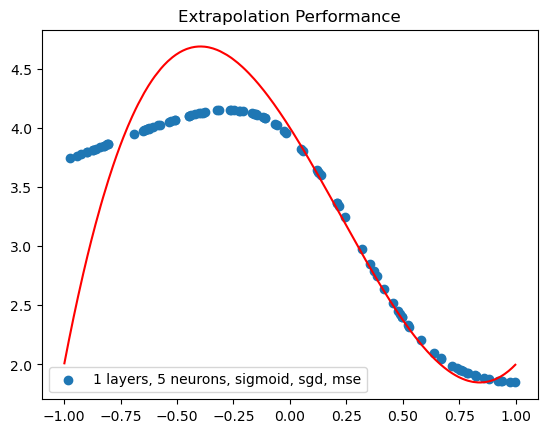

Epoch 1/50
157/157 [==============================] - 2s 10ms/step - loss: 1.5478 - val_loss: 0.8902
Epoch 2/50
157/157 [==============================] - 1s 9ms/step - loss: 0.8626 - val_loss: 0.7910
Epoch 3/50
157/157 [==============================] - 1s 5ms/step - loss: 0.8141 - val_loss: 0.7556
Epoch 4/50
157/157 [==============================] - 1s 5ms/step - loss: 0.7797 - val_loss: 0.7282
Epoch 5/50
157/157 [==============================] - 1s 8ms/step - loss: 0.7504 - val_loss: 0.7053
Epoch 6/50
157/157 [==============================] - 2s 10ms/step - loss: 0.7268 - val_loss: 0.6888
Epoch 7/50
157/157 [==============================] - 2s 10ms/step - loss: 0.7084 - val_loss: 0.6743
Epoch 8/50
157/157 [==============================] - 2s 10ms/step - loss: 0.6945 - val_loss: 0.6640
Epoch 9/50
157/157 [==============================] - 1s 7ms/step - loss: 0.6842 - val_loss: 0.6553
Epoch 10/50
157/157 [==============================] - 2s 11ms/step - loss: 0.6763 - val_loss: 0

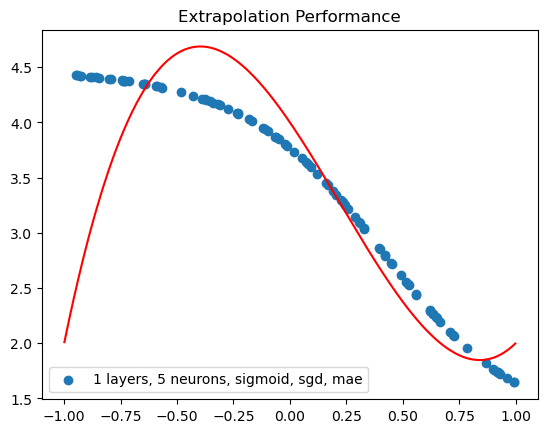

Epoch 1/50
157/157 [==============================] - 2s 9ms/step - loss: 12.7221 - val_loss: 10.8745
Epoch 2/50
157/157 [==============================] - 1s 8ms/step - loss: 9.0990 - val_loss: 7.6295
Epoch 3/50
157/157 [==============================] - 1s 4ms/step - loss: 6.2731 - val_loss: 5.1393
Epoch 4/50
157/157 [==============================] - 1s 4ms/step - loss: 4.1797 - val_loss: 3.3664
Epoch 5/50
157/157 [==============================] - 1s 6ms/step - loss: 2.7546 - val_loss: 2.2117
Epoch 6/50
157/157 [==============================] - 1s 8ms/step - loss: 1.8762 - val_loss: 1.5337
Epoch 7/50
157/157 [==============================] - 1s 9ms/step - loss: 1.3767 - val_loss: 1.1608
Epoch 8/50
157/157 [==============================] - 2s 10ms/step - loss: 1.1070 - val_loss: 0.9600
Epoch 9/50
157/157 [==============================] - 1s 8ms/step - loss: 0.9622 - val_loss: 0.8500
Epoch 10/50
157/157 [==============================] - 1s 8ms/step - loss: 0.8774 - val_loss: 0.7

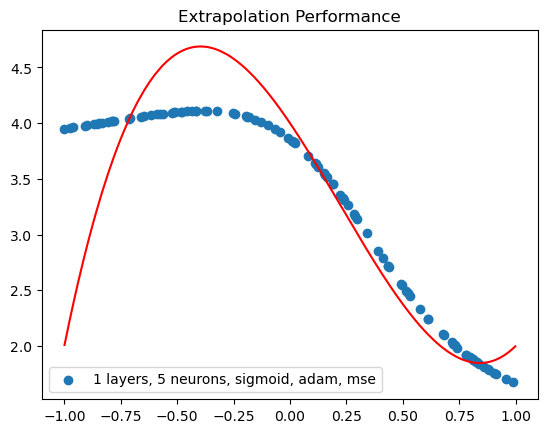

Epoch 1/50
157/157 [==============================] - 2s 6ms/step - loss: 3.3287 - val_loss: 3.0194
Epoch 2/50
157/157 [==============================] - 1s 9ms/step - loss: 2.6452 - val_loss: 2.3435
Epoch 3/50
157/157 [==============================] - 1s 9ms/step - loss: 1.9934 - val_loss: 1.7268
Epoch 4/50
157/157 [==============================] - 2s 11ms/step - loss: 1.4691 - val_loss: 1.2823
Epoch 5/50
157/157 [==============================] - 1s 8ms/step - loss: 1.1411 - val_loss: 1.0144
Epoch 6/50
157/157 [==============================] - 1s 7ms/step - loss: 0.9545 - val_loss: 0.8660
Epoch 7/50
157/157 [==============================] - 2s 11ms/step - loss: 0.8506 - val_loss: 0.7822
Epoch 8/50
157/157 [==============================] - 1s 9ms/step - loss: 0.7851 - val_loss: 0.7298
Epoch 9/50
157/157 [==============================] - 1s 8ms/step - loss: 0.7399 - val_loss: 0.6935
Epoch 10/50
157/157 [==============================] - 1s 6ms/step - loss: 0.7062 - val_loss: 0.66

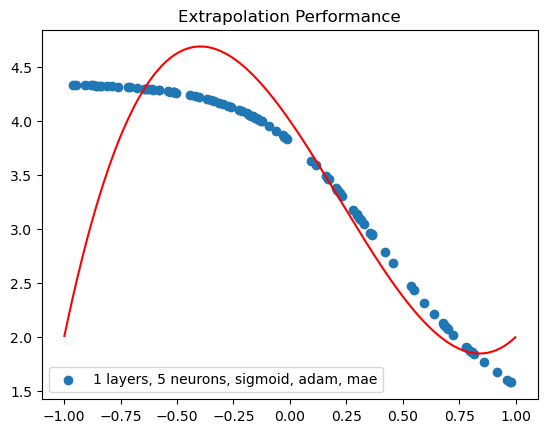

Epoch 1/50
157/157 [==============================] - 1s 5ms/step - loss: 1.8257 - val_loss: 0.7322
Epoch 2/50
157/157 [==============================] - 1s 5ms/step - loss: 0.7302 - val_loss: 0.6253
Epoch 3/50
157/157 [==============================] - 1s 8ms/step - loss: 0.6344 - val_loss: 0.5557
Epoch 4/50
157/157 [==============================] - 1s 8ms/step - loss: 0.5552 - val_loss: 0.4704
Epoch 5/50
157/157 [==============================] - 1s 7ms/step - loss: 0.4840 - val_loss: 0.4130
Epoch 6/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4301 - val_loss: 0.3729
Epoch 7/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3919 - val_loss: 0.3407
Epoch 8/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3647 - val_loss: 0.3170
Epoch 9/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3444 - val_loss: 0.3007
Epoch 10/50
157/157 [==============================] - 1s 8ms/step - loss: 0.3299 - val_loss: 0.2880

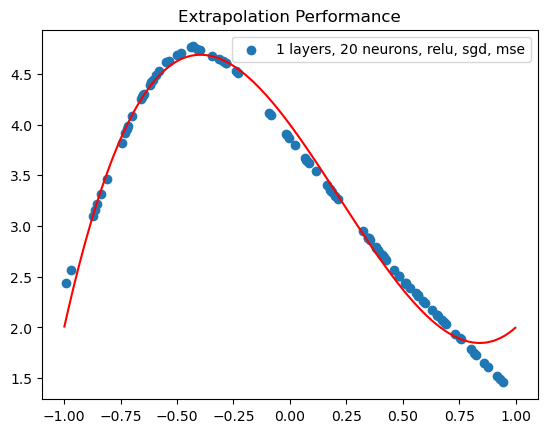

Epoch 1/50
157/157 [==============================] - 2s 10ms/step - loss: 2.0418 - val_loss: 0.8722
Epoch 2/50
157/157 [==============================] - 2s 10ms/step - loss: 0.7497 - val_loss: 0.6588
Epoch 3/50
157/157 [==============================] - 1s 9ms/step - loss: 0.6652 - val_loss: 0.6286
Epoch 4/50
157/157 [==============================] - 1s 7ms/step - loss: 0.6428 - val_loss: 0.6111
Epoch 5/50
157/157 [==============================] - 1s 6ms/step - loss: 0.6247 - val_loss: 0.5937
Epoch 6/50
157/157 [==============================] - 1s 5ms/step - loss: 0.6066 - val_loss: 0.5731
Epoch 7/50
157/157 [==============================] - 1s 7ms/step - loss: 0.5875 - val_loss: 0.5542
Epoch 8/50
157/157 [==============================] - 1s 8ms/step - loss: 0.5679 - val_loss: 0.5354
Epoch 9/50
157/157 [==============================] - 2s 11ms/step - loss: 0.5484 - val_loss: 0.5176
Epoch 10/50
157/157 [==============================] - 2s 10ms/step - loss: 0.5300 - val_loss: 0.

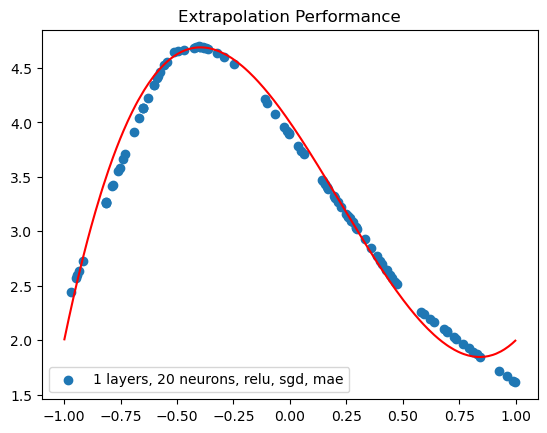

Epoch 1/50
157/157 [==============================] - 4s 17ms/step - loss: 9.7604 - val_loss: 6.9990
Epoch 2/50
157/157 [==============================] - 2s 16ms/step - loss: 4.4082 - val_loss: 1.9944
Epoch 3/50
157/157 [==============================] - 2s 10ms/step - loss: 1.1703 - val_loss: 0.7638
Epoch 4/50
157/157 [==============================] - 2s 14ms/step - loss: 0.7647 - val_loss: 0.6732
Epoch 5/50
157/157 [==============================] - 2s 12ms/step - loss: 0.6945 - val_loss: 0.6139
Epoch 6/50
157/157 [==============================] - 2s 10ms/step - loss: 0.6329 - val_loss: 0.5520
Epoch 7/50
157/157 [==============================] - 1s 9ms/step - loss: 0.5684 - val_loss: 0.4903
Epoch 8/50
157/157 [==============================] - 1s 7ms/step - loss: 0.5063 - val_loss: 0.4345
Epoch 9/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4520 - val_loss: 0.3871
Epoch 10/50
157/157 [==============================] - 1s 7ms/step - loss: 0.4088 - val_loss: 

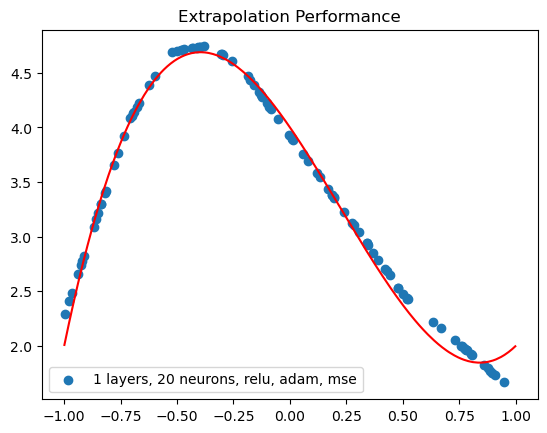

Epoch 1/50
157/157 [==============================] - 2s 8ms/step - loss: 2.8990 - val_loss: 2.3350
Epoch 2/50
157/157 [==============================] - 1s 9ms/step - loss: 1.6280 - val_loss: 1.0509
Epoch 3/50
157/157 [==============================] - 1s 7ms/step - loss: 0.8022 - val_loss: 0.6718
Epoch 4/50
157/157 [==============================] - 1s 6ms/step - loss: 0.6652 - val_loss: 0.6168
Epoch 5/50
157/157 [==============================] - 2s 10ms/step - loss: 0.6153 - val_loss: 0.5700
Epoch 6/50
157/157 [==============================] - 1s 9ms/step - loss: 0.5699 - val_loss: 0.5283
Epoch 7/50
157/157 [==============================] - 1s 6ms/step - loss: 0.5291 - val_loss: 0.4921
Epoch 8/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4966 - val_loss: 0.4648
Epoch 9/50
157/157 [==============================] - 2s 10ms/step - loss: 0.4722 - val_loss: 0.4434
Epoch 10/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4537 - val_loss: 0.42

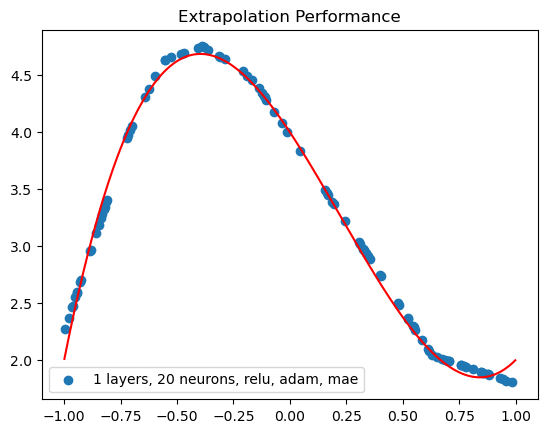

Epoch 1/50
157/157 [==============================] - 2s 11ms/step - loss: 1.6315 - val_loss: 1.0276
Epoch 2/50
157/157 [==============================] - 1s 9ms/step - loss: 1.0469 - val_loss: 0.8987
Epoch 3/50
157/157 [==============================] - 2s 10ms/step - loss: 0.9280 - val_loss: 0.8216
Epoch 4/50
157/157 [==============================] - 1s 6ms/step - loss: 0.8687 - val_loss: 0.7827
Epoch 5/50
157/157 [==============================] - 2s 11ms/step - loss: 0.8385 - val_loss: 0.7685
Epoch 6/50
157/157 [==============================] - 2s 11ms/step - loss: 0.8264 - val_loss: 0.7723
Epoch 7/50
157/157 [==============================] - 1s 7ms/step - loss: 0.8196 - val_loss: 0.7570
Epoch 8/50
157/157 [==============================] - 1s 8ms/step - loss: 0.8134 - val_loss: 0.7573
Epoch 9/50
157/157 [==============================] - 1s 9ms/step - loss: 0.8102 - val_loss: 0.7552
Epoch 10/50
157/157 [==============================] - 1s 7ms/step - loss: 0.8026 - val_loss: 0.

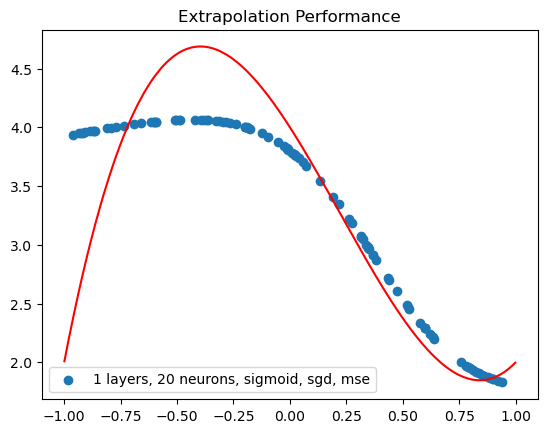

Epoch 1/50
157/157 [==============================] - 1s 4ms/step - loss: 1.1363 - val_loss: 0.8601
Epoch 2/50
157/157 [==============================] - 2s 11ms/step - loss: 0.8865 - val_loss: 0.8203
Epoch 3/50
157/157 [==============================] - 2s 10ms/step - loss: 0.8461 - val_loss: 0.7841
Epoch 4/50
157/157 [==============================] - 1s 9ms/step - loss: 0.8098 - val_loss: 0.7584
Epoch 5/50
157/157 [==============================] - 1s 8ms/step - loss: 0.7791 - val_loss: 0.7311
Epoch 6/50
157/157 [==============================] - 1s 7ms/step - loss: 0.7537 - val_loss: 0.7129
Epoch 7/50
157/157 [==============================] - 1s 7ms/step - loss: 0.7341 - val_loss: 0.7001
Epoch 8/50
157/157 [==============================] - 1s 9ms/step - loss: 0.7211 - val_loss: 0.6909
Epoch 9/50
157/157 [==============================] - 1s 5ms/step - loss: 0.7127 - val_loss: 0.6846
Epoch 10/50
157/157 [==============================] - 1s 8ms/step - loss: 0.7069 - val_loss: 0.68

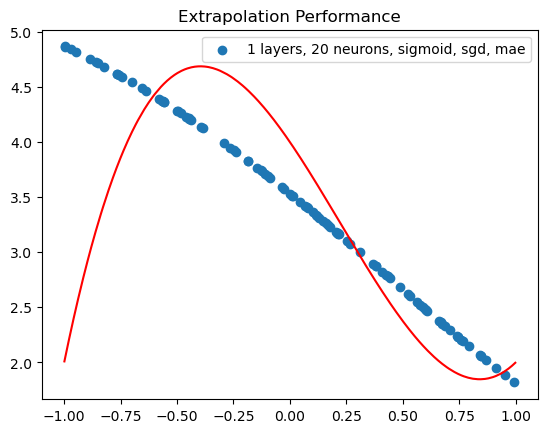

Epoch 1/50
157/157 [==============================] - 3s 13ms/step - loss: 4.8850 - val_loss: 2.3350
Epoch 2/50
157/157 [==============================] - 2s 10ms/step - loss: 1.5528 - val_loss: 1.0551
Epoch 3/50
157/157 [==============================] - 2s 11ms/step - loss: 1.0263 - val_loss: 0.8828
Epoch 4/50
157/157 [==============================] - 1s 9ms/step - loss: 0.9234 - val_loss: 0.8218
Epoch 5/50
157/157 [==============================] - 1s 6ms/step - loss: 0.8716 - val_loss: 0.7891
Epoch 6/50
157/157 [==============================] - 1s 7ms/step - loss: 0.8425 - val_loss: 0.7717
Epoch 7/50
157/157 [==============================] - 1s 7ms/step - loss: 0.8268 - val_loss: 0.7646
Epoch 8/50
157/157 [==============================] - 1s 9ms/step - loss: 0.8193 - val_loss: 0.7638
Epoch 9/50
157/157 [==============================] - 2s 11ms/step - loss: 0.8159 - val_loss: 0.7576
Epoch 10/50
157/157 [==============================] - 2s 11ms/step - loss: 0.8128 - val_loss: 0

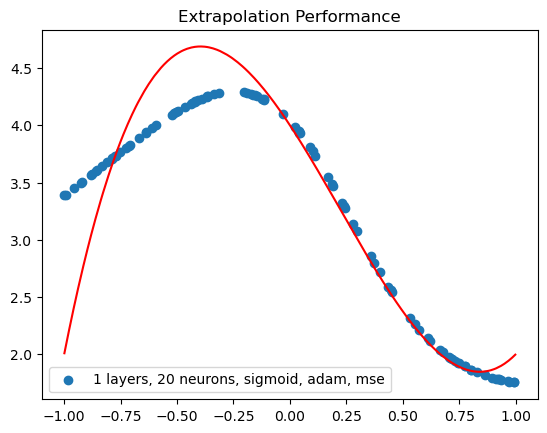

Epoch 1/50
157/157 [==============================] - 2s 10ms/step - loss: 2.0485 - val_loss: 1.2472
Epoch 2/50
157/157 [==============================] - 1s 9ms/step - loss: 0.9470 - val_loss: 0.7749
Epoch 3/50
157/157 [==============================] - 1s 8ms/step - loss: 0.7709 - val_loss: 0.7140
Epoch 4/50
157/157 [==============================] - 2s 10ms/step - loss: 0.7251 - val_loss: 0.6854
Epoch 5/50
157/157 [==============================] - 1s 8ms/step - loss: 0.7024 - val_loss: 0.6713
Epoch 6/50
157/157 [==============================] - 1s 9ms/step - loss: 0.6919 - val_loss: 0.6651
Epoch 7/50
157/157 [==============================] - 1s 8ms/step - loss: 0.6880 - val_loss: 0.6619
Epoch 8/50
157/157 [==============================] - 2s 10ms/step - loss: 0.6852 - val_loss: 0.6599
Epoch 9/50
157/157 [==============================] - 1s 9ms/step - loss: 0.6837 - val_loss: 0.6581
Epoch 10/50
157/157 [==============================] - 1s 9ms/step - loss: 0.6817 - val_loss: 0.6

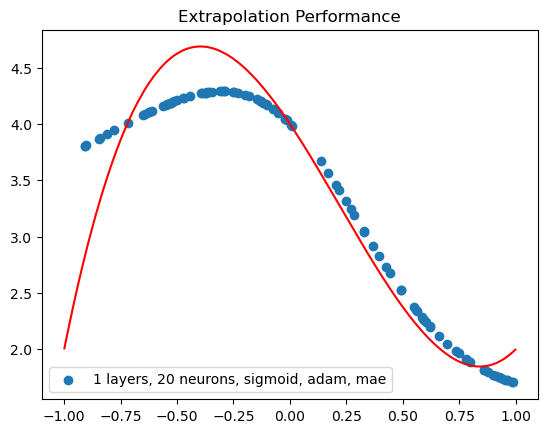

Epoch 1/50
157/157 [==============================] - 2s 11ms/step - loss: 1.8431 - val_loss: 0.4546
Epoch 2/50
157/157 [==============================] - 2s 11ms/step - loss: 0.4342 - val_loss: 0.3542
Epoch 3/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3614 - val_loss: 0.3351
Epoch 4/50
157/157 [==============================] - 1s 9ms/step - loss: 0.3256 - val_loss: 0.2792
Epoch 5/50
157/157 [==============================] - 2s 12ms/step - loss: 0.3040 - val_loss: 0.2730
Epoch 6/50
157/157 [==============================] - 2s 11ms/step - loss: 0.2918 - val_loss: 0.2703
Epoch 7/50
157/157 [==============================] - 1s 9ms/step - loss: 0.2850 - val_loss: 0.2586
Epoch 8/50
157/157 [==============================] - 1s 9ms/step - loss: 0.2824 - val_loss: 0.2597
Epoch 9/50
157/157 [==============================] - 2s 11ms/step - loss: 0.2780 - val_loss: 0.2517
Epoch 10/50
157/157 [==============================] - 1s 9ms/step - loss: 0.2762 - val_loss: 0

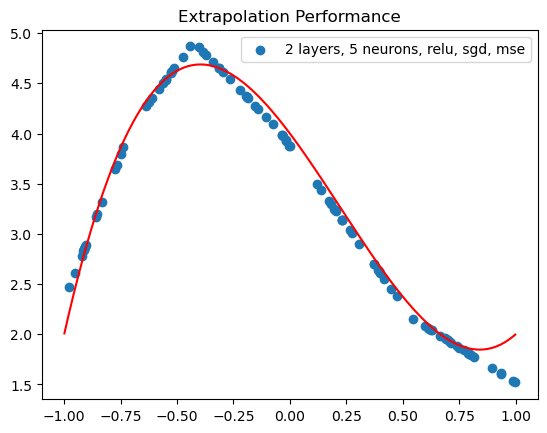

Epoch 1/50
157/157 [==============================] - 2s 7ms/step - loss: 1.9979 - val_loss: 0.9524
Epoch 2/50
157/157 [==============================] - 1s 5ms/step - loss: 0.7503 - val_loss: 0.5570
Epoch 3/50
157/157 [==============================] - 1s 7ms/step - loss: 0.5601 - val_loss: 0.5300
Epoch 4/50
157/157 [==============================] - 1s 6ms/step - loss: 0.5453 - val_loss: 0.5218
Epoch 5/50
157/157 [==============================] - 1s 6ms/step - loss: 0.5355 - val_loss: 0.5102
Epoch 6/50
157/157 [==============================] - 2s 11ms/step - loss: 0.5249 - val_loss: 0.4991
Epoch 7/50
157/157 [==============================] - 1s 9ms/step - loss: 0.5146 - val_loss: 0.4916
Epoch 8/50
157/157 [==============================] - 1s 8ms/step - loss: 0.5031 - val_loss: 0.4764
Epoch 9/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4960 - val_loss: 0.4687
Epoch 10/50
157/157 [==============================] - 1s 8ms/step - loss: 0.4887 - val_loss: 0.461

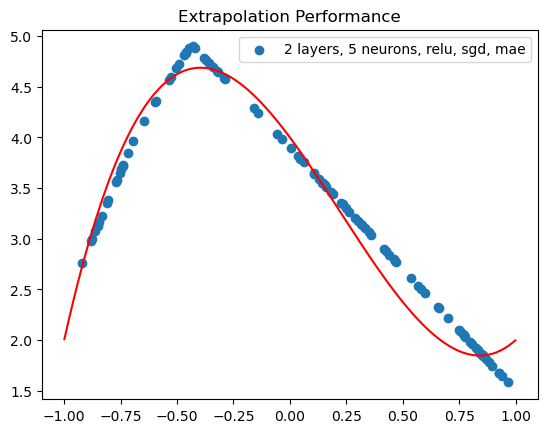

Epoch 1/50
157/157 [==============================] - 3s 10ms/step - loss: 9.4468 - val_loss: 6.7842
Epoch 2/50
157/157 [==============================] - 1s 8ms/step - loss: 4.0268 - val_loss: 1.7176
Epoch 3/50
157/157 [==============================] - 1s 5ms/step - loss: 1.1641 - val_loss: 0.8256
Epoch 4/50
157/157 [==============================] - 1s 4ms/step - loss: 0.8176 - val_loss: 0.7072
Epoch 5/50
157/157 [==============================] - 1s 3ms/step - loss: 0.7083 - val_loss: 0.6167
Epoch 6/50
157/157 [==============================] - 1s 8ms/step - loss: 0.6262 - val_loss: 0.5442
Epoch 7/50
157/157 [==============================] - 1s 6ms/step - loss: 0.5583 - val_loss: 0.4854
Epoch 8/50
157/157 [==============================] - 1s 6ms/step - loss: 0.5008 - val_loss: 0.4364
Epoch 9/50
157/157 [==============================] - 1s 8ms/step - loss: 0.4533 - val_loss: 0.3952
Epoch 10/50
157/157 [==============================] - 1s 4ms/step - loss: 0.4198 - val_loss: 0.367

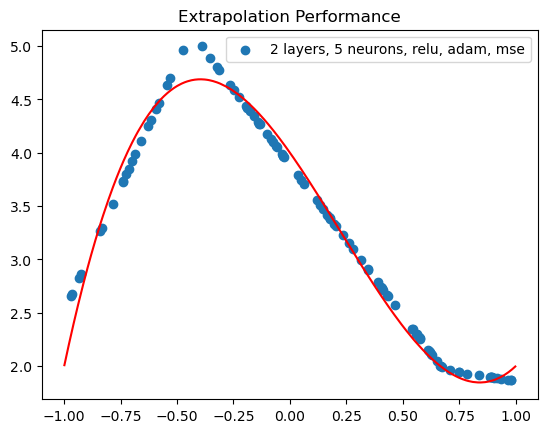

Epoch 1/50
157/157 [==============================] - 3s 9ms/step - loss: 2.9534 - val_loss: 2.5819
Epoch 2/50
157/157 [==============================] - 1s 4ms/step - loss: 1.9546 - val_loss: 1.4169
Epoch 3/50
157/157 [==============================] - 1s 5ms/step - loss: 1.0801 - val_loss: 0.8218
Epoch 4/50
157/157 [==============================] - 1s 6ms/step - loss: 0.7429 - val_loss: 0.6608
Epoch 5/50
157/157 [==============================] - 2s 12ms/step - loss: 0.6489 - val_loss: 0.6049
Epoch 6/50
157/157 [==============================] - 1s 7ms/step - loss: 0.6074 - val_loss: 0.5767
Epoch 7/50
157/157 [==============================] - 1s 5ms/step - loss: 0.5798 - val_loss: 0.5518
Epoch 8/50
157/157 [==============================] - 1s 4ms/step - loss: 0.5574 - val_loss: 0.5367
Epoch 9/50
157/157 [==============================] - 1s 6ms/step - loss: 0.5393 - val_loss: 0.5170
Epoch 10/50
157/157 [==============================] - 2s 12ms/step - loss: 0.5230 - val_loss: 0.49

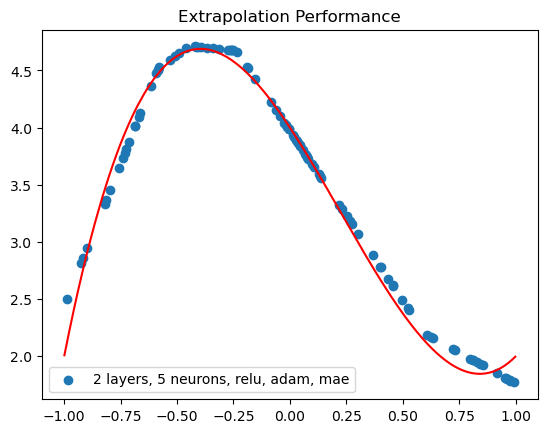

Epoch 1/50
157/157 [==============================] - 1s 6ms/step - loss: 2.1548 - val_loss: 1.0808
Epoch 2/50
157/157 [==============================] - 1s 5ms/step - loss: 1.1747 - val_loss: 1.0520
Epoch 3/50
157/157 [==============================] - 1s 4ms/step - loss: 1.1397 - val_loss: 1.0190
Epoch 4/50
157/157 [==============================] - 1s 5ms/step - loss: 1.0963 - val_loss: 0.9750
Epoch 5/50
157/157 [==============================] - 1s 4ms/step - loss: 1.0465 - val_loss: 0.9281
Epoch 6/50
157/157 [==============================] - 1s 4ms/step - loss: 0.9915 - val_loss: 0.8812
Epoch 7/50
157/157 [==============================] - 1s 4ms/step - loss: 0.9341 - val_loss: 0.8272
Epoch 8/50
157/157 [==============================] - 1s 5ms/step - loss: 0.8781 - val_loss: 0.7791
Epoch 9/50
157/157 [==============================] - 1s 7ms/step - loss: 0.8281 - val_loss: 0.7405
Epoch 10/50
157/157 [==============================] - 1s 6ms/step - loss: 0.7881 - val_loss: 0.7088

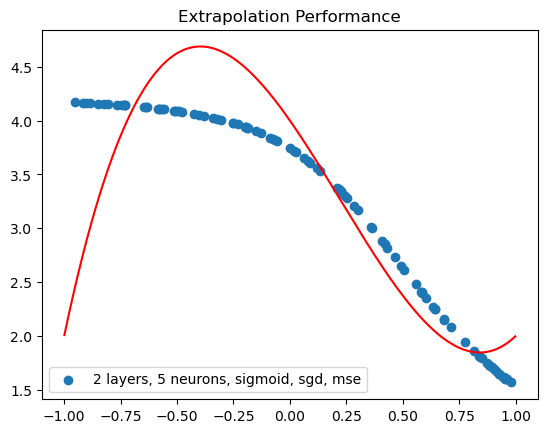

Epoch 1/50
157/157 [==============================] - 2s 7ms/step - loss: 1.6371 - val_loss: 0.9723
Epoch 2/50
157/157 [==============================] - 1s 7ms/step - loss: 0.9925 - val_loss: 0.9321
Epoch 3/50
157/157 [==============================] - 1s 6ms/step - loss: 0.9819 - val_loss: 0.9263
Epoch 4/50
157/157 [==============================] - 1s 8ms/step - loss: 0.9757 - val_loss: 0.9202
Epoch 5/50
157/157 [==============================] - 1s 6ms/step - loss: 0.9687 - val_loss: 0.9139
Epoch 6/50
157/157 [==============================] - 2s 10ms/step - loss: 0.9614 - val_loss: 0.9065
Epoch 7/50
157/157 [==============================] - 1s 8ms/step - loss: 0.9532 - val_loss: 0.8985
Epoch 8/50
157/157 [==============================] - 1s 6ms/step - loss: 0.9443 - val_loss: 0.8898
Epoch 9/50
157/157 [==============================] - 1s 8ms/step - loss: 0.9341 - val_loss: 0.8801
Epoch 10/50
157/157 [==============================] - 2s 12ms/step - loss: 0.9228 - val_loss: 0.86

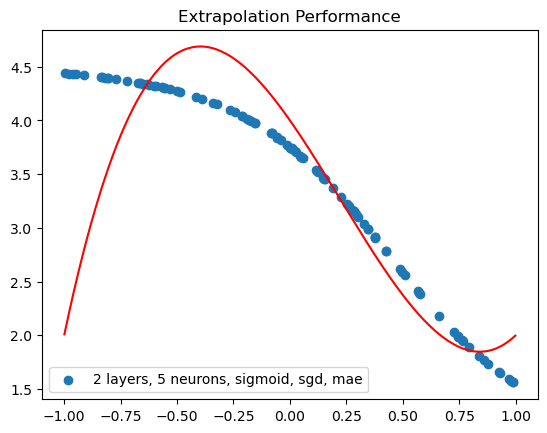

Epoch 1/50
157/157 [==============================] - 3s 14ms/step - loss: 9.7026 - val_loss: 7.1706
Epoch 2/50
157/157 [==============================] - 2s 11ms/step - loss: 5.3352 - val_loss: 3.9095
Epoch 3/50
157/157 [==============================] - 1s 9ms/step - loss: 3.0155 - val_loss: 2.2885
Epoch 4/50
157/157 [==============================] - 1s 5ms/step - loss: 1.9091 - val_loss: 1.5366
Epoch 5/50
157/157 [==============================] - 1s 9ms/step - loss: 1.4123 - val_loss: 1.2037
Epoch 6/50
157/157 [==============================] - 1s 9ms/step - loss: 1.1962 - val_loss: 1.0511
Epoch 7/50
157/157 [==============================] - 2s 10ms/step - loss: 1.0850 - val_loss: 0.9614
Epoch 8/50
157/157 [==============================] - 1s 6ms/step - loss: 1.0057 - val_loss: 0.8900
Epoch 9/50
157/157 [==============================] - 1s 5ms/step - loss: 0.9311 - val_loss: 0.8206
Epoch 10/50
157/157 [==============================] - 1s 7ms/step - loss: 0.8570 - val_loss: 0.7

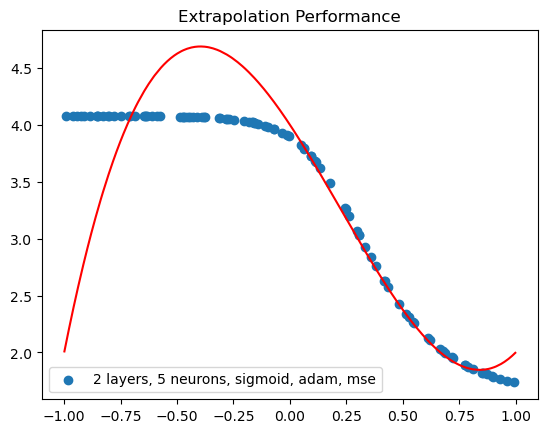

Epoch 1/50
157/157 [==============================] - 2s 7ms/step - loss: 3.3759 - val_loss: 2.9804
Epoch 2/50
157/157 [==============================] - 1s 6ms/step - loss: 2.5210 - val_loss: 2.1436
Epoch 3/50
157/157 [==============================] - 1s 5ms/step - loss: 1.7711 - val_loss: 1.5057
Epoch 4/50
157/157 [==============================] - 1s 5ms/step - loss: 1.3123 - val_loss: 1.1647
Epoch 5/50
157/157 [==============================] - 1s 7ms/step - loss: 1.0931 - val_loss: 0.9904
Epoch 6/50
157/157 [==============================] - 1s 9ms/step - loss: 0.9856 - val_loss: 0.9123
Epoch 7/50
157/157 [==============================] - 2s 12ms/step - loss: 0.9353 - val_loss: 0.8716
Epoch 8/50
157/157 [==============================] - 2s 10ms/step - loss: 0.8998 - val_loss: 0.8364
Epoch 9/50
157/157 [==============================] - 1s 7ms/step - loss: 0.8603 - val_loss: 0.7950
Epoch 10/50
157/157 [==============================] - 2s 10ms/step - loss: 0.8142 - val_loss: 0.7

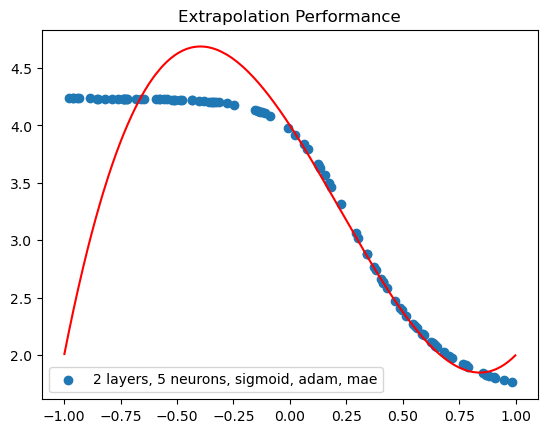

Epoch 1/50
157/157 [==============================] - 3s 17ms/step - loss: 1.7244 - val_loss: 0.4851
Epoch 2/50
157/157 [==============================] - 2s 12ms/step - loss: 0.4140 - val_loss: 0.3255
Epoch 3/50
157/157 [==============================] - 2s 13ms/step - loss: 0.3324 - val_loss: 0.2800
Epoch 4/50
157/157 [==============================] - 2s 12ms/step - loss: 0.2992 - val_loss: 0.2635
Epoch 5/50
157/157 [==============================] - 2s 10ms/step - loss: 0.2845 - val_loss: 0.2554
Epoch 6/50
157/157 [==============================] - 2s 12ms/step - loss: 0.2762 - val_loss: 0.2552
Epoch 7/50
157/157 [==============================] - 2s 12ms/step - loss: 0.2724 - val_loss: 0.2459
Epoch 8/50
157/157 [==============================] - 2s 10ms/step - loss: 0.2694 - val_loss: 0.2480
Epoch 9/50
157/157 [==============================] - 1s 7ms/step - loss: 0.2676 - val_loss: 0.2476
Epoch 10/50
157/157 [==============================] - 2s 13ms/step - loss: 0.2666 - val_los

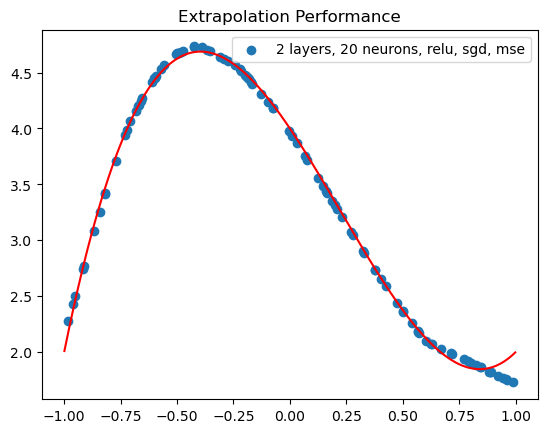

Epoch 1/50
157/157 [==============================] - 1s 4ms/step - loss: 1.5839 - val_loss: 0.6839
Epoch 2/50
157/157 [==============================] - 1s 7ms/step - loss: 0.6784 - val_loss: 0.6321
Epoch 3/50
157/157 [==============================] - 1s 7ms/step - loss: 0.6349 - val_loss: 0.5936
Epoch 4/50
157/157 [==============================] - 1s 8ms/step - loss: 0.5953 - val_loss: 0.5537
Epoch 5/50
157/157 [==============================] - 1s 8ms/step - loss: 0.5537 - val_loss: 0.5138
Epoch 6/50
157/157 [==============================] - 1s 9ms/step - loss: 0.5131 - val_loss: 0.4792
Epoch 7/50
157/157 [==============================] - 1s 8ms/step - loss: 0.4794 - val_loss: 0.4474
Epoch 8/50
157/157 [==============================] - 1s 7ms/step - loss: 0.4550 - val_loss: 0.4327
Epoch 9/50
157/157 [==============================] - 0s 3ms/step - loss: 0.4392 - val_loss: 0.4137
Epoch 10/50
157/157 [==============================] - 1s 3ms/step - loss: 0.4287 - val_loss: 0.4203

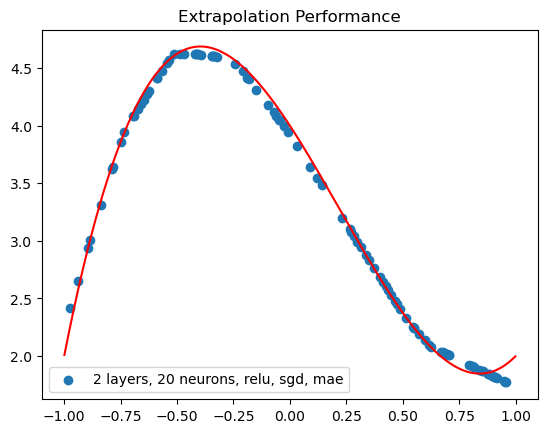

Epoch 1/50
157/157 [==============================] - 1s 4ms/step - loss: 7.8479 - val_loss: 1.7347
Epoch 2/50
157/157 [==============================] - 1s 3ms/step - loss: 1.0412 - val_loss: 0.7284
Epoch 3/50
157/157 [==============================] - 1s 5ms/step - loss: 0.6335 - val_loss: 0.4626
Epoch 4/50
157/157 [==============================] - 1s 4ms/step - loss: 0.4328 - val_loss: 0.3415
Epoch 5/50
157/157 [==============================] - 1s 4ms/step - loss: 0.3446 - val_loss: 0.2965
Epoch 6/50
157/157 [==============================] - 1s 5ms/step - loss: 0.3056 - val_loss: 0.2697
Epoch 7/50
157/157 [==============================] - 0s 3ms/step - loss: 0.2879 - val_loss: 0.2575
Epoch 8/50
157/157 [==============================] - 1s 4ms/step - loss: 0.2768 - val_loss: 0.2511
Epoch 9/50
157/157 [==============================] - 1s 3ms/step - loss: 0.2736 - val_loss: 0.2467
Epoch 10/50
157/157 [==============================] - 1s 6ms/step - loss: 0.2710 - val_loss: 0.2449

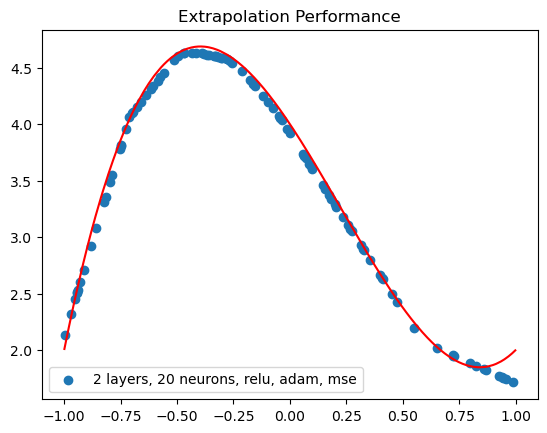

Epoch 1/50
157/157 [==============================] - 1s 5ms/step - loss: 2.3163 - val_loss: 1.0446
Epoch 2/50
157/157 [==============================] - 1s 5ms/step - loss: 0.7173 - val_loss: 0.5675
Epoch 3/50
157/157 [==============================] - 1s 3ms/step - loss: 0.5238 - val_loss: 0.4598
Epoch 4/50
157/157 [==============================] - 1s 7ms/step - loss: 0.4499 - val_loss: 0.4184
Epoch 5/50
157/157 [==============================] - 1s 4ms/step - loss: 0.4245 - val_loss: 0.4069
Epoch 6/50
157/157 [==============================] - 1s 4ms/step - loss: 0.4141 - val_loss: 0.3981
Epoch 7/50
157/157 [==============================] - 1s 5ms/step - loss: 0.4125 - val_loss: 0.3980
Epoch 8/50
157/157 [==============================] - 1s 5ms/step - loss: 0.4089 - val_loss: 0.3997
Epoch 9/50
157/157 [==============================] - 1s 4ms/step - loss: 0.4093 - val_loss: 0.4007
Epoch 10/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4067 - val_loss: 0.4034

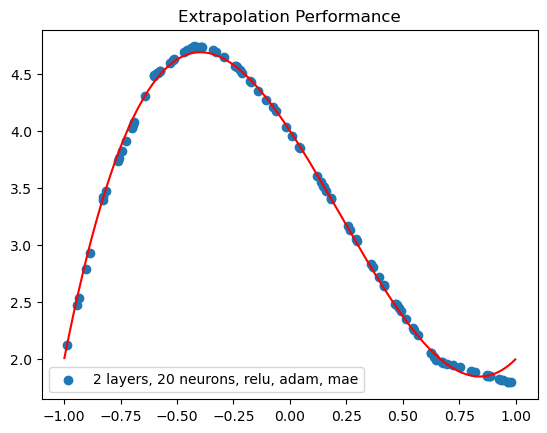

Epoch 1/50
157/157 [==============================] - 2s 9ms/step - loss: 1.4316 - val_loss: 1.1915
Epoch 2/50
157/157 [==============================] - 1s 5ms/step - loss: 1.2944 - val_loss: 1.1590
Epoch 3/50
157/157 [==============================] - 1s 9ms/step - loss: 1.2616 - val_loss: 1.1272
Epoch 4/50
157/157 [==============================] - 1s 9ms/step - loss: 1.2253 - val_loss: 1.0994
Epoch 5/50
157/157 [==============================] - 1s 9ms/step - loss: 1.1840 - val_loss: 1.0539
Epoch 6/50
157/157 [==============================] - 1s 9ms/step - loss: 1.1360 - val_loss: 1.0229
Epoch 7/50
157/157 [==============================] - 1s 8ms/step - loss: 1.0802 - val_loss: 0.9794
Epoch 8/50
157/157 [==============================] - 1s 7ms/step - loss: 1.0201 - val_loss: 0.9106
Epoch 9/50
157/157 [==============================] - 1s 6ms/step - loss: 0.9603 - val_loss: 0.8641
Epoch 10/50
157/157 [==============================] - 1s 6ms/step - loss: 0.9067 - val_loss: 0.8123

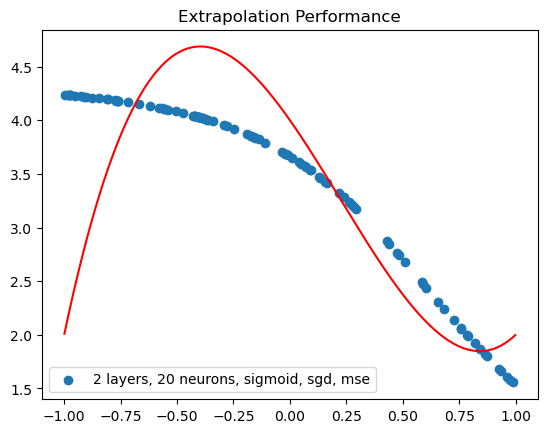

Epoch 1/50
157/157 [==============================] - 3s 16ms/step - loss: 1.2826 - val_loss: 0.9294
Epoch 2/50
157/157 [==============================] - 1s 8ms/step - loss: 0.9804 - val_loss: 0.9257
Epoch 3/50
157/157 [==============================] - 1s 8ms/step - loss: 0.9764 - val_loss: 0.9222
Epoch 4/50
157/157 [==============================] - 1s 8ms/step - loss: 0.9725 - val_loss: 0.9183
Epoch 5/50
157/157 [==============================] - 1s 4ms/step - loss: 0.9682 - val_loss: 0.9140
Epoch 6/50
157/157 [==============================] - 1s 9ms/step - loss: 0.9636 - val_loss: 0.9111
Epoch 7/50
157/157 [==============================] - 2s 11ms/step - loss: 0.9589 - val_loss: 0.9049
Epoch 8/50
157/157 [==============================] - 1s 5ms/step - loss: 0.9532 - val_loss: 0.8996
Epoch 9/50
157/157 [==============================] - 1s 6ms/step - loss: 0.9472 - val_loss: 0.8939
Epoch 10/50
157/157 [==============================] - 1s 7ms/step - loss: 0.9409 - val_loss: 0.88

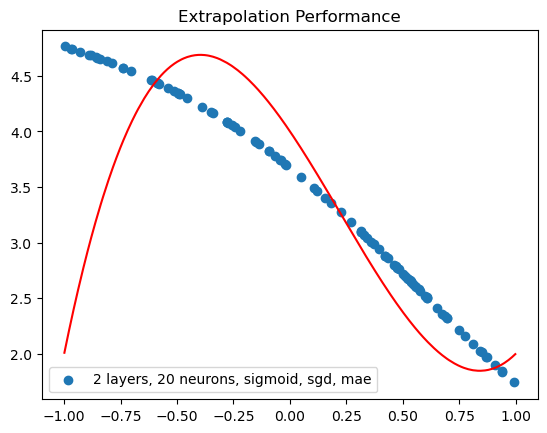

Epoch 1/50
157/157 [==============================] - 2s 6ms/step - loss: 9.5211 - val_loss: 3.8406
Epoch 2/50
157/157 [==============================] - 1s 7ms/step - loss: 2.1848 - val_loss: 1.2830
Epoch 3/50
157/157 [==============================] - 1s 7ms/step - loss: 1.2086 - val_loss: 1.0388
Epoch 4/50
157/157 [==============================] - 1s 8ms/step - loss: 1.0994 - val_loss: 0.9723
Epoch 5/50
157/157 [==============================] - 1s 9ms/step - loss: 1.0287 - val_loss: 0.9068
Epoch 6/50
157/157 [==============================] - 1s 9ms/step - loss: 0.9543 - val_loss: 0.8390
Epoch 7/50
157/157 [==============================] - 1s 7ms/step - loss: 0.8807 - val_loss: 0.7736
Epoch 8/50
157/157 [==============================] - 1s 9ms/step - loss: 0.8125 - val_loss: 0.7167
Epoch 9/50
157/157 [==============================] - 1s 7ms/step - loss: 0.7541 - val_loss: 0.6681
Epoch 10/50
157/157 [==============================] - 1s 6ms/step - loss: 0.7068 - val_loss: 0.6309

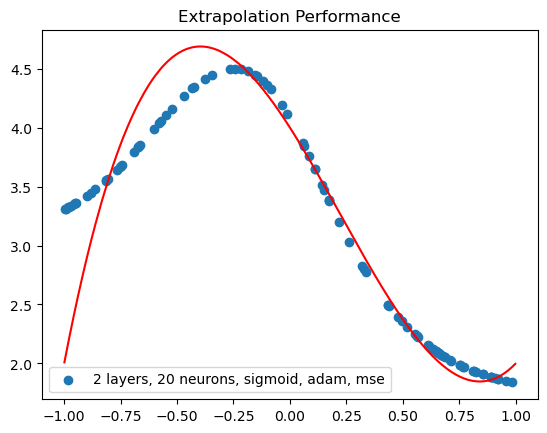

Epoch 1/50
157/157 [==============================] - 2s 10ms/step - loss: 3.3494 - val_loss: 1.8648
Epoch 2/50
157/157 [==============================] - 1s 9ms/step - loss: 1.2502 - val_loss: 0.9496
Epoch 3/50
157/157 [==============================] - 2s 10ms/step - loss: 0.9423 - val_loss: 0.8674
Epoch 4/50
157/157 [==============================] - 1s 8ms/step - loss: 0.8931 - val_loss: 0.8246
Epoch 5/50
157/157 [==============================] - 1s 9ms/step - loss: 0.8417 - val_loss: 0.7702
Epoch 6/50
157/157 [==============================] - 1s 9ms/step - loss: 0.7777 - val_loss: 0.7085
Epoch 7/50
157/157 [==============================] - 1s 9ms/step - loss: 0.7102 - val_loss: 0.6502
Epoch 8/50
157/157 [==============================] - 1s 7ms/step - loss: 0.6544 - val_loss: 0.6082
Epoch 9/50
157/157 [==============================] - 1s 6ms/step - loss: 0.6212 - val_loss: 0.5883
Epoch 10/50
157/157 [==============================] - 2s 11ms/step - loss: 0.6065 - val_loss: 0.5

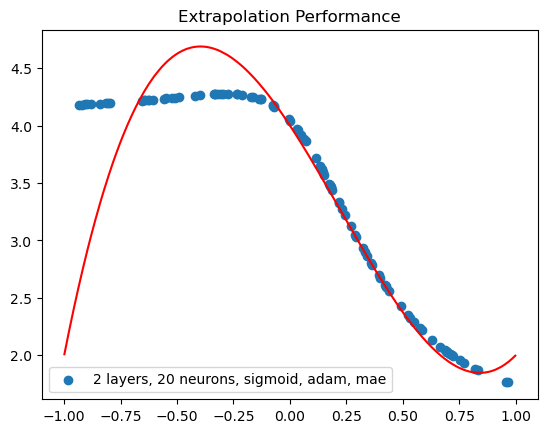

{'layers': 1, 'neurons': 5, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'mse', 'train_loss': 0.24800696969032288, 'test_loss': 0.013718120753765106}
{'layers': 1, 'neurons': 5, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'mae', 'train_loss': 0.4073643088340759, 'test_loss': 0.13887636363506317}
{'layers': 1, 'neurons': 5, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'mse', 'train_loss': 0.27712658047676086, 'test_loss': 0.05652378126978874}
{'layers': 1, 'neurons': 5, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'mae', 'train_loss': 0.40818697214126587, 'test_loss': 0.14461039006710052}
{'layers': 1, 'neurons': 5, 'activation': 'sigmoid', 'optimizer': 'sgd', 'loss': 'mse', 'train_loss': 0.40383341908454895, 'test_loss': 0.1808512657880783}
{'layers': 1, 'neurons': 5, 'activation': 'sigmoid', 'optimizer': 'sgd', 'loss': 'mae', 'train_loss': 0.5644031763076782, 'test_loss': 0.3846900165081024}
{'layers': 1, 'neurons': 5, 'activation': 'sigmoid', 'optimizer': 'adam

In [24]:
from keras.optimizers import SGD, Adam
from keras.activations import relu, sigmoid
from keras.losses import mean_absolute_error, mean_squared_error


# Function to create a neural network model
def create_model(layers, neurons, activation, optimizer, loss):
    model = tf.keras.Sequential()
    model.add(Dense(neurons, input_dim=1, activation=activation))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=optimizer, loss=loss)
    return model

# Parameters to test
layer_options = [1, 2]
neuron_options = [5, 20]
activation_options = ['relu', 'sigmoid']
optimizer_options = ['sgd', 'adam']
loss_options = ['mse', 'mae']

# Train and evaluate models
results = []

for layers in layer_options:
    for neurons in neuron_options:
        for activation in activation_options:
            for optimizer in optimizer_options:
                for loss in loss_options:
                    model = create_model(layers, neurons, activation, optimizer, loss)
                    history = model.fit(x_train, y_train, batch_size=32, epochs=50, shuffle=True, validation_data=(x_valid, y_valid))
                    train_loss = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)
                    test_loss = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)
                    x_predicted = np.random.uniform(-1, 1, 100)
                    y_predicted = model.predict(x_predicted)
                    results.append({
                        'layers': layers,
                        'neurons': neurons,
                        'activation': activation,
                        'optimizer': optimizer,
                        'loss': loss,
                        'train_loss': train_loss,
                        'test_loss': test_loss
                    })
                    plt.scatter(x_predicted, y_predicted, label=f'{layers} layers, {neurons} neurons, {activation}, {optimizer}, {loss}')
                    plt.plot(x_valid, y_target, c='red')
                    plt.title('Extrapolation Performance')
                    plt.legend()
                    plt.show()

# Summarize results
for result in results:
    print(result)


### Exercise 11.3
  
Proviamo ora ad estendere il modello per adattarlo a una semplice funzione trigonometrica 2D come $f(x,y) = \sin(x^2 + y^2)$ nell'intervallo $x \in \left[-\frac{3}{2}, \frac{3}{2}\right]$ e $y \in \left[-\frac{3}{2}, \frac{3}{2}\right]$.


Epoch 1/50
157/157 [==============================] - 2s 13ms/step - loss: 0.5260 - val_loss: 0.3519
Epoch 2/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3800 - val_loss: 0.3489
Epoch 3/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3772 - val_loss: 0.3480
Epoch 4/50
157/157 [==============================] - 1s 8ms/step - loss: 0.3756 - val_loss: 0.3447
Epoch 5/50
157/157 [==============================] - 2s 10ms/step - loss: 0.3744 - val_loss: 0.3467
Epoch 6/50
157/157 [==============================] - 1s 9ms/step - loss: 0.3737 - val_loss: 0.3434
Epoch 7/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3730 - val_loss: 0.3456
Epoch 8/50
157/157 [==============================] - 1s 8ms/step - loss: 0.3723 - val_loss: 0.3421
Epoch 9/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3715 - val_loss: 0.3412
Epoch 10/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3706 - val_loss: 0.34

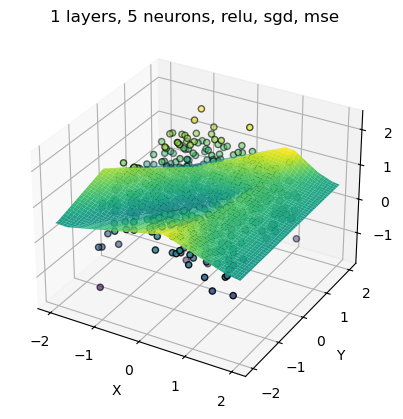

Epoch 1/50
157/157 [==============================] - 1s 7ms/step - loss: 0.6139 - val_loss: 0.5194
Epoch 2/50
157/157 [==============================] - 1s 8ms/step - loss: 0.5154 - val_loss: 0.4873
Epoch 3/50
157/157 [==============================] - 1s 8ms/step - loss: 0.5026 - val_loss: 0.4812
Epoch 4/50
157/157 [==============================] - 1s 9ms/step - loss: 0.4990 - val_loss: 0.4755
Epoch 5/50
157/157 [==============================] - 1s 9ms/step - loss: 0.4973 - val_loss: 0.4747
Epoch 6/50
157/157 [==============================] - 1s 8ms/step - loss: 0.4962 - val_loss: 0.4752
Epoch 7/50
157/157 [==============================] - 1s 8ms/step - loss: 0.4954 - val_loss: 0.4733
Epoch 8/50
157/157 [==============================] - 1s 9ms/step - loss: 0.4948 - val_loss: 0.4722
Epoch 9/50
157/157 [==============================] - 1s 8ms/step - loss: 0.4940 - val_loss: 0.4740
Epoch 10/50
157/157 [==============================] - 1s 8ms/step - loss: 0.4934 - val_loss: 0.4716

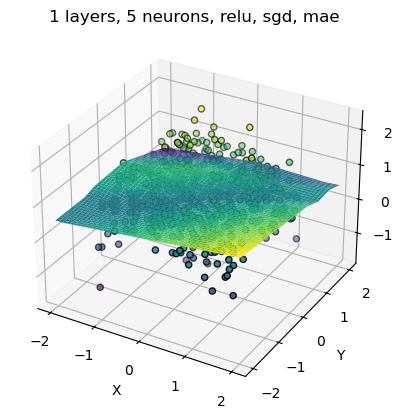

Epoch 1/50
157/157 [==============================] - 2s 9ms/step - loss: 1.2432 - val_loss: 0.7191
Epoch 2/50
157/157 [==============================] - 1s 7ms/step - loss: 0.5505 - val_loss: 0.4023
Epoch 3/50
157/157 [==============================] - 1s 7ms/step - loss: 0.4155 - val_loss: 0.3682
Epoch 4/50
157/157 [==============================] - 1s 7ms/step - loss: 0.4003 - val_loss: 0.3619
Epoch 5/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3945 - val_loss: 0.3570
Epoch 6/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3894 - val_loss: 0.3524
Epoch 7/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3852 - val_loss: 0.3490
Epoch 8/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3813 - val_loss: 0.3465
Epoch 9/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3783 - val_loss: 0.3454
Epoch 10/50
157/157 [==============================] - 1s 9ms/step - loss: 0.3760 - val_loss: 0.3431

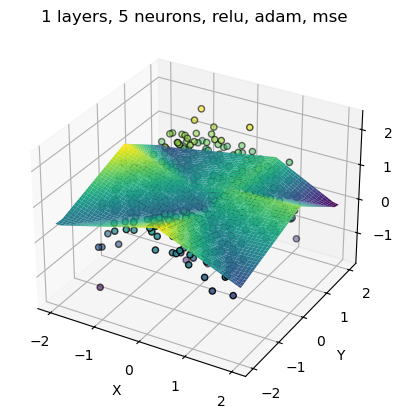

Epoch 1/50
157/157 [==============================] - 2s 8ms/step - loss: 0.5771 - val_loss: 0.5296
Epoch 2/50
157/157 [==============================] - 1s 8ms/step - loss: 0.5276 - val_loss: 0.5054
Epoch 3/50
157/157 [==============================] - 1s 8ms/step - loss: 0.5115 - val_loss: 0.4915
Epoch 4/50
157/157 [==============================] - 1s 6ms/step - loss: 0.5033 - val_loss: 0.4842
Epoch 5/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4982 - val_loss: 0.4780
Epoch 6/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4951 - val_loss: 0.4735
Epoch 7/50
157/157 [==============================] - 1s 9ms/step - loss: 0.4930 - val_loss: 0.4702
Epoch 8/50
157/157 [==============================] - 2s 14ms/step - loss: 0.4915 - val_loss: 0.4692
Epoch 9/50
157/157 [==============================] - 1s 8ms/step - loss: 0.4901 - val_loss: 0.4675
Epoch 10/50
157/157 [==============================] - 1s 7ms/step - loss: 0.4890 - val_loss: 0.465

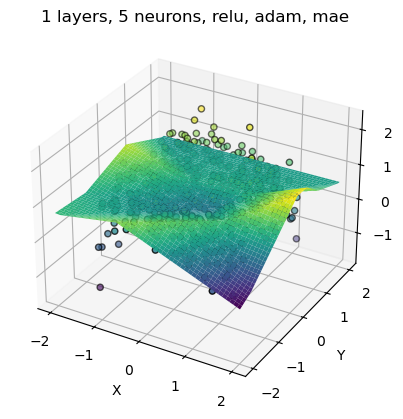

Epoch 1/50
157/157 [==============================] - 2s 8ms/step - loss: 0.4616 - val_loss: 0.3600
Epoch 2/50
157/157 [==============================] - 1s 8ms/step - loss: 0.3859 - val_loss: 0.3488
Epoch 3/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3765 - val_loss: 0.3424
Epoch 4/50
157/157 [==============================] - 1s 8ms/step - loss: 0.3715 - val_loss: 0.3407
Epoch 5/50
157/157 [==============================] - 1s 8ms/step - loss: 0.3683 - val_loss: 0.3346
Epoch 6/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3662 - val_loss: 0.3339
Epoch 7/50
157/157 [==============================] - 1s 8ms/step - loss: 0.3639 - val_loss: 0.3305
Epoch 8/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3624 - val_loss: 0.3294
Epoch 9/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3605 - val_loss: 0.3272
Epoch 10/50
157/157 [==============================] - 2s 10ms/step - loss: 0.3594 - val_loss: 0.326

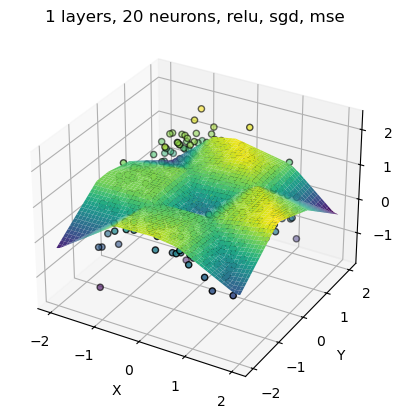

Epoch 1/50
157/157 [==============================] - 2s 7ms/step - loss: 0.6402 - val_loss: 0.4690
Epoch 2/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4899 - val_loss: 0.4651
Epoch 3/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4864 - val_loss: 0.4645
Epoch 4/50
157/157 [==============================] - 1s 9ms/step - loss: 0.4839 - val_loss: 0.4619
Epoch 5/50
157/157 [==============================] - 1s 5ms/step - loss: 0.4818 - val_loss: 0.4581
Epoch 6/50
157/157 [==============================] - 1s 4ms/step - loss: 0.4806 - val_loss: 0.4596
Epoch 7/50
157/157 [==============================] - 1s 4ms/step - loss: 0.4793 - val_loss: 0.4580
Epoch 8/50
157/157 [==============================] - 1s 5ms/step - loss: 0.4781 - val_loss: 0.4587
Epoch 9/50
157/157 [==============================] - 1s 4ms/step - loss: 0.4776 - val_loss: 0.4570
Epoch 10/50
157/157 [==============================] - 1s 4ms/step - loss: 0.4769 - val_loss: 0.4564

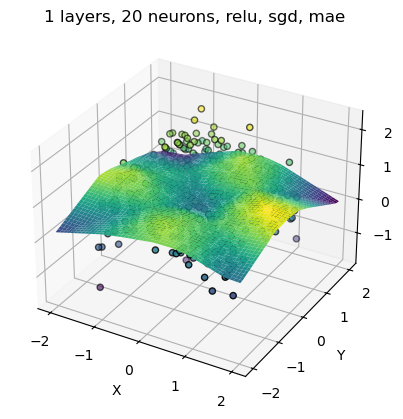

Epoch 1/50
157/157 [==============================] - 3s 10ms/step - loss: 0.4798 - val_loss: 0.3536
Epoch 2/50
157/157 [==============================] - 1s 8ms/step - loss: 0.3860 - val_loss: 0.3468
Epoch 3/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3792 - val_loss: 0.3419
Epoch 4/50
157/157 [==============================] - 1s 9ms/step - loss: 0.3745 - val_loss: 0.3399
Epoch 5/50
157/157 [==============================] - 1s 8ms/step - loss: 0.3704 - val_loss: 0.3360
Epoch 6/50
157/157 [==============================] - 1s 8ms/step - loss: 0.3664 - val_loss: 0.3328
Epoch 7/50
157/157 [==============================] - 1s 5ms/step - loss: 0.3628 - val_loss: 0.3311
Epoch 8/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3595 - val_loss: 0.3262
Epoch 9/50
157/157 [==============================] - 1s 5ms/step - loss: 0.3559 - val_loss: 0.3231
Epoch 10/50
157/157 [==============================] - 1s 4ms/step - loss: 0.3528 - val_loss: 0.320

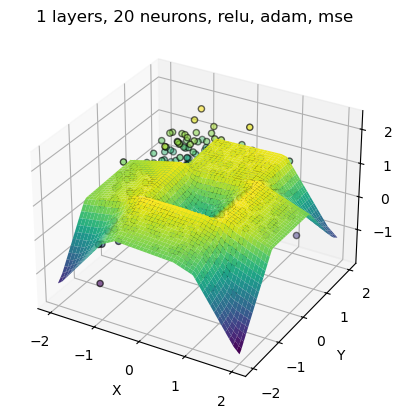

Epoch 1/50
157/157 [==============================] - 2s 10ms/step - loss: 0.6130 - val_loss: 0.4753
Epoch 2/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4930 - val_loss: 0.4669
Epoch 3/50
157/157 [==============================] - 2s 10ms/step - loss: 0.4862 - val_loss: 0.4612
Epoch 4/50
157/157 [==============================] - 1s 9ms/step - loss: 0.4823 - val_loss: 0.4602
Epoch 5/50
157/157 [==============================] - 1s 9ms/step - loss: 0.4793 - val_loss: 0.4565
Epoch 6/50
157/157 [==============================] - 2s 11ms/step - loss: 0.4767 - val_loss: 0.4550
Epoch 7/50
157/157 [==============================] - 2s 10ms/step - loss: 0.4745 - val_loss: 0.4499
Epoch 8/50
157/157 [==============================] - 1s 7ms/step - loss: 0.4723 - val_loss: 0.4485
Epoch 9/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4700 - val_loss: 0.4454
Epoch 10/50
157/157 [==============================] - 1s 5ms/step - loss: 0.4673 - val_loss: 0.

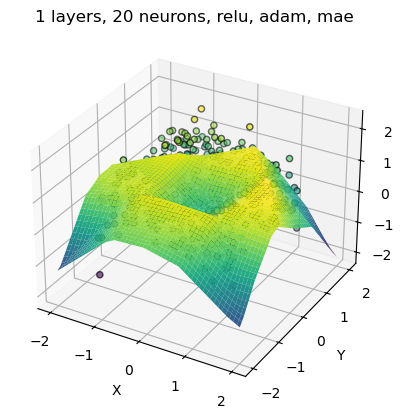

Epoch 1/50
157/157 [==============================] - 2s 10ms/step - loss: 0.4518 - val_loss: 0.3673
Epoch 2/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3927 - val_loss: 0.3610
Epoch 3/50
157/157 [==============================] - 1s 8ms/step - loss: 0.3877 - val_loss: 0.3577
Epoch 4/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3824 - val_loss: 0.3507
Epoch 5/50
157/157 [==============================] - 2s 10ms/step - loss: 0.3777 - val_loss: 0.3478
Epoch 6/50
157/157 [==============================] - 1s 8ms/step - loss: 0.3747 - val_loss: 0.3443
Epoch 7/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3728 - val_loss: 0.3431
Epoch 8/50
157/157 [==============================] - 1s 9ms/step - loss: 0.3709 - val_loss: 0.3434
Epoch 9/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3697 - val_loss: 0.3408
Epoch 10/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3679 - val_loss: 0.33

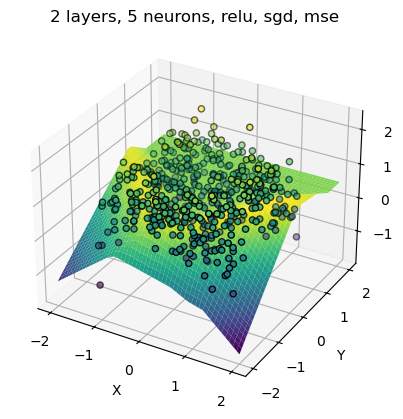

Epoch 1/50
157/157 [==============================] - 2s 8ms/step - loss: 0.5569 - val_loss: 0.4762
Epoch 2/50
157/157 [==============================] - 1s 8ms/step - loss: 0.4990 - val_loss: 0.4711
Epoch 3/50
157/157 [==============================] - 1s 5ms/step - loss: 0.4933 - val_loss: 0.4688
Epoch 4/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4905 - val_loss: 0.4661
Epoch 5/50
157/157 [==============================] - 2s 10ms/step - loss: 0.4893 - val_loss: 0.4658
Epoch 6/50
157/157 [==============================] - 1s 7ms/step - loss: 0.4886 - val_loss: 0.4650
Epoch 7/50
157/157 [==============================] - 1s 7ms/step - loss: 0.4880 - val_loss: 0.4648
Epoch 8/50
157/157 [==============================] - 1s 5ms/step - loss: 0.4876 - val_loss: 0.4647
Epoch 9/50
157/157 [==============================] - 2s 12ms/step - loss: 0.4872 - val_loss: 0.4644
Epoch 10/50
157/157 [==============================] - 2s 10ms/step - loss: 0.4869 - val_loss: 0.4

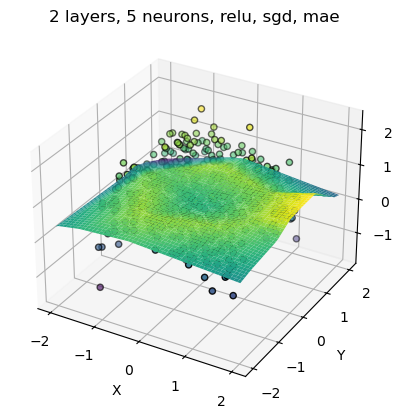

Epoch 1/50
157/157 [==============================] - 2s 9ms/step - loss: 0.6876 - val_loss: 0.4530
Epoch 2/50
157/157 [==============================] - 1s 5ms/step - loss: 0.4645 - val_loss: 0.3890
Epoch 3/50
157/157 [==============================] - 1s 5ms/step - loss: 0.4139 - val_loss: 0.3590
Epoch 4/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3906 - val_loss: 0.3482
Epoch 5/50
157/157 [==============================] - 1s 5ms/step - loss: 0.3801 - val_loss: 0.3421
Epoch 6/50
157/157 [==============================] - 1s 5ms/step - loss: 0.3753 - val_loss: 0.3392
Epoch 7/50
157/157 [==============================] - 1s 5ms/step - loss: 0.3712 - val_loss: 0.3376
Epoch 8/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3678 - val_loss: 0.3338
Epoch 9/50
157/157 [==============================] - 1s 8ms/step - loss: 0.3649 - val_loss: 0.3315
Epoch 10/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3618 - val_loss: 0.3294

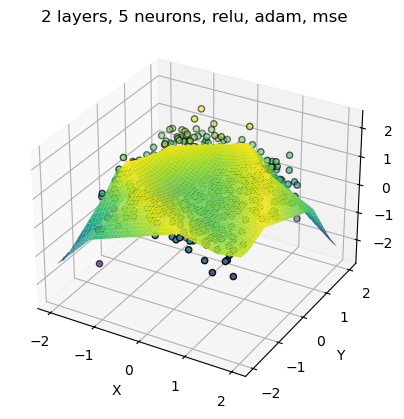

Epoch 1/50
157/157 [==============================] - 2s 9ms/step - loss: 0.8072 - val_loss: 0.5558
Epoch 2/50
157/157 [==============================] - 1s 9ms/step - loss: 0.5253 - val_loss: 0.4600
Epoch 3/50
157/157 [==============================] - 1s 9ms/step - loss: 0.4866 - val_loss: 0.4591
Epoch 4/50
157/157 [==============================] - 1s 7ms/step - loss: 0.4809 - val_loss: 0.4588
Epoch 5/50
157/157 [==============================] - 1s 5ms/step - loss: 0.4785 - val_loss: 0.4592
Epoch 6/50
157/157 [==============================] - 1s 5ms/step - loss: 0.4772 - val_loss: 0.4578
Epoch 7/50
157/157 [==============================] - 1s 4ms/step - loss: 0.4762 - val_loss: 0.4574
Epoch 8/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4748 - val_loss: 0.4571
Epoch 9/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4736 - val_loss: 0.4546
Epoch 10/50
157/157 [==============================] - 1s 4ms/step - loss: 0.4727 - val_loss: 0.4530

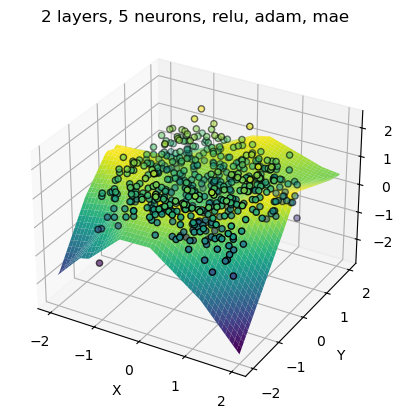

Epoch 1/50
157/157 [==============================] - 2s 10ms/step - loss: 0.4426 - val_loss: 0.3523
Epoch 2/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3785 - val_loss: 0.3446
Epoch 3/50
157/157 [==============================] - 1s 9ms/step - loss: 0.3717 - val_loss: 0.3401
Epoch 4/50
157/157 [==============================] - 2s 10ms/step - loss: 0.3670 - val_loss: 0.3386
Epoch 5/50
157/157 [==============================] - 1s 8ms/step - loss: 0.3637 - val_loss: 0.3354
Epoch 6/50
157/157 [==============================] - 1s 8ms/step - loss: 0.3610 - val_loss: 0.3311
Epoch 7/50
157/157 [==============================] - 1s 6ms/step - loss: 0.3583 - val_loss: 0.3287
Epoch 8/50
157/157 [==============================] - 1s 5ms/step - loss: 0.3556 - val_loss: 0.3270
Epoch 9/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3530 - val_loss: 0.3255
Epoch 10/50
157/157 [==============================] - 1s 7ms/step - loss: 0.3501 - val_loss: 0.32

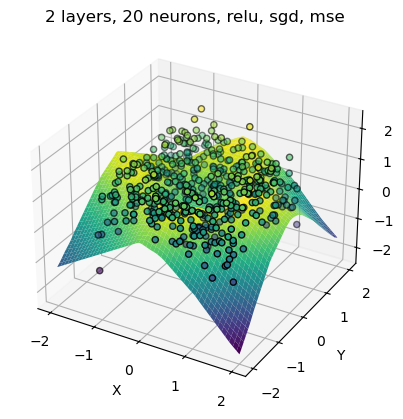

Epoch 1/50
157/157 [==============================] - 3s 13ms/step - loss: 0.5419 - val_loss: 0.4702
Epoch 2/50
157/157 [==============================] - 2s 11ms/step - loss: 0.4878 - val_loss: 0.4671
Epoch 3/50
157/157 [==============================] - 2s 10ms/step - loss: 0.4854 - val_loss: 0.4622
Epoch 4/50
157/157 [==============================] - 2s 11ms/step - loss: 0.4840 - val_loss: 0.4608
Epoch 5/50
157/157 [==============================] - 1s 8ms/step - loss: 0.4830 - val_loss: 0.4615
Epoch 6/50
157/157 [==============================] - 1s 9ms/step - loss: 0.4821 - val_loss: 0.4612
Epoch 7/50
157/157 [==============================] - 2s 11ms/step - loss: 0.4814 - val_loss: 0.4592
Epoch 8/50
157/157 [==============================] - 1s 9ms/step - loss: 0.4805 - val_loss: 0.4574
Epoch 9/50
157/157 [==============================] - 1s 8ms/step - loss: 0.4799 - val_loss: 0.4570
Epoch 10/50
157/157 [==============================] - 2s 11ms/step - loss: 0.4793 - val_loss: 

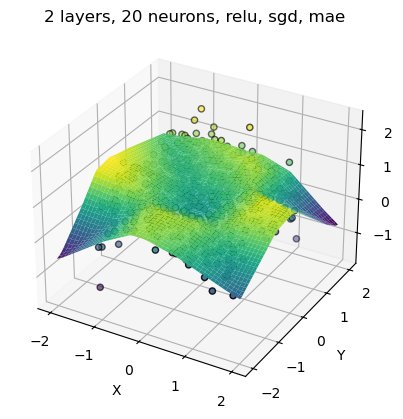

Epoch 1/50
157/157 [==============================] - 3s 11ms/step - loss: 0.4182 - val_loss: 0.3547
Epoch 2/50
157/157 [==============================] - 2s 10ms/step - loss: 0.3788 - val_loss: 0.3393
Epoch 3/50
157/157 [==============================] - 1s 8ms/step - loss: 0.3659 - val_loss: 0.3348
Epoch 4/50
157/157 [==============================] - 2s 11ms/step - loss: 0.3568 - val_loss: 0.3250
Epoch 5/50
157/157 [==============================] - 2s 10ms/step - loss: 0.3487 - val_loss: 0.3134
Epoch 6/50
157/157 [==============================] - 1s 9ms/step - loss: 0.3362 - val_loss: 0.3014
Epoch 7/50
157/157 [==============================] - 2s 10ms/step - loss: 0.3240 - val_loss: 0.2967
Epoch 8/50
157/157 [==============================] - 2s 12ms/step - loss: 0.3136 - val_loss: 0.2811
Epoch 9/50
157/157 [==============================] - 2s 12ms/step - loss: 0.3063 - val_loss: 0.2803
Epoch 10/50
157/157 [==============================] - 2s 11ms/step - loss: 0.2989 - val_loss

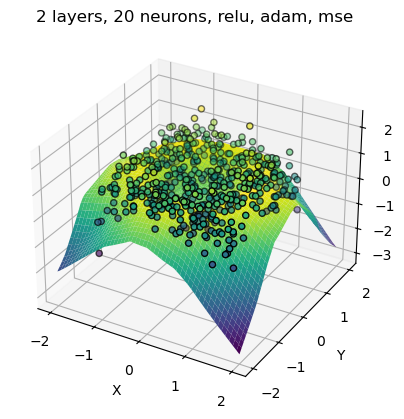

Epoch 1/50
157/157 [==============================] - 2s 10ms/step - loss: 0.5319 - val_loss: 0.4632
Epoch 2/50
157/157 [==============================] - 2s 10ms/step - loss: 0.4832 - val_loss: 0.4561
Epoch 3/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4781 - val_loss: 0.4504
Epoch 4/50
157/157 [==============================] - 1s 5ms/step - loss: 0.4744 - val_loss: 0.4464
Epoch 5/50
157/157 [==============================] - 1s 6ms/step - loss: 0.4693 - val_loss: 0.4455
Epoch 6/50
157/157 [==============================] - 2s 10ms/step - loss: 0.4662 - val_loss: 0.4427
Epoch 7/50
157/157 [==============================] - 1s 9ms/step - loss: 0.4612 - val_loss: 0.4343
Epoch 8/50
157/157 [==============================] - 2s 10ms/step - loss: 0.4567 - val_loss: 0.4354
Epoch 9/50
157/157 [==============================] - 2s 10ms/step - loss: 0.4516 - val_loss: 0.4274
Epoch 10/50
157/157 [==============================] - 1s 9ms/step - loss: 0.4456 - val_loss: 0

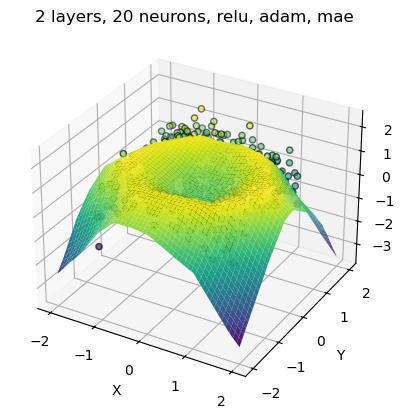

{'layers': 1, 'neurons': 5, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'mse', 'train_loss': 0.3162311613559723}
{'layers': 1, 'neurons': 5, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'mae', 'train_loss': 0.4601088762283325}
{'layers': 1, 'neurons': 5, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'mse', 'train_loss': 0.32692426443099976}
{'layers': 1, 'neurons': 5, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'mae', 'train_loss': 0.44391605257987976}
{'layers': 1, 'neurons': 20, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'mse', 'train_loss': 0.28708991408348083}
{'layers': 1, 'neurons': 20, 'activation': 'relu', 'optimizer': 'sgd', 'loss': 'mae', 'train_loss': 0.43826183676719666}
{'layers': 1, 'neurons': 20, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'mse', 'train_loss': 0.26451095938682556}
{'layers': 1, 'neurons': 20, 'activation': 'relu', 'optimizer': 'adam', 'loss': 'mae', 'train_loss': 0.40262269973754883}
{'layers': 2, 'neurons': 5, 'activ

In [25]:
from mpl_toolkits.mplot3d import Axes3D

# Generazione dei dati per la funzione f(x, y) = sin(x^2 + y^2)
def generate_data(n_samples, sigma=0.5):
    x = np.random.uniform(-1.5, 1.5, n_samples)
    y = np.random.uniform(-1.5, 1.5, n_samples)
    z = np.sin(x**2 + y**2)
    z_noisy = np.random.normal(z, sigma)
    return x, y, z_noisy, z

# Generazione dei dati di training e di validazione
x_train, y_train, z_train, _ = generate_data(5000)
x_valid, y_valid, z_valid, z_target = generate_data(500)

# Funzione per creare il modello di rete neurale
def create_model(layers, neurons, activation, optimizer, loss):
    model = tf.keras.Sequential()
    model.add(Dense(neurons, input_dim=2, activation=activation))
    for _ in range(layers - 1):
        model.add(Dense(neurons, activation=activation))
    model.add(Dense(1))  # Output layer
    model.compile(optimizer=optimizer, loss=loss)
    return model

# Parametri da testare
layer_options = [1, 2]
neuron_options = [5, 20]
activation_options = ['relu']
optimizer_options = ['sgd', 'adam']
loss_options = ['mse', 'mae']

x_grid = np.linspace(-2, 2, 200)
y_grid = np.linspace(-2, 2, 200)
x_grid, y_grid = np.meshgrid(x_grid, y_grid)

# Train and evaluate models
results = []

for layers in layer_options:
    for neurons in neuron_options:
        for activation in activation_options:
            for optimizer in optimizer_options:
                for loss in loss_options:
                    model = create_model(layers, neurons, activation, optimizer, loss)
                    history = model.fit(np.column_stack((x_train, y_train)), z_train, batch_size=32, epochs=50, shuffle=True, validation_data=(np.column_stack((x_valid, y_valid)), z_valid))
                    train_loss = model.evaluate(np.column_stack((x_valid, y_valid)), z_valid, batch_size=32, verbose=1)
                    # Predizione sulla griglia
                    z_pred_grid = model.predict(np.column_stack((x_grid.ravel(), y_grid.ravel()))).reshape(x_grid.shape)
                    results.append({
                        'layers': layers,
                        'neurons': neurons,
                        'activation': activation,
                        'optimizer': optimizer,
                        'loss': loss,
                        'train_loss': train_loss
                    })

                    # Plot 3D surface
                    fig = plt.figure()
                    ax = fig.add_subplot(111, projection='3d')
                    ax.plot_surface(x_grid, y_grid, z_pred_grid, cmap='viridis')
                    ax.scatter(x_valid, y_valid, z_valid, c=z_valid, cmap='viridis', edgecolor='k')
                    ax.set_xlabel('X')
                    ax.set_ylabel('Y')
                    ax.set_zlabel('Z')
                    ax.set_title(label=f'{layers} layers, {neurons} neurons, {activation}, {optimizer}, {loss}')
                    plt.show()

# Summarize results
for result in results:
    print(result)

